# Dự án: Phân tích dữ liệu tuyển dụng

## Import các thư viện

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# import kagglehub
import math
from ipywidgets import interact
import warnings
import ipywidgets as widgets
from IPython.display import display
import plotly.express as px
warnings.filterwarnings('ignore')

## Đọc dữ liệu

In [2]:
# Hiện tại đang bị lỗi

# # Download latest version
# path = kagglehub.dataset_download("bismasajjad/global-ai-job-market-and-salary-trends-2025")

# print("Path to dataset files:", path)
# df = pd.read_csv(path + '\\ai_job_dataset.csv')

df = pd.read_csv('ai_job_dataset1.csv')

## Xem qua dữ liệu

In [3]:
df.head()

,job_id,job_title,salary_usd,salary_currency,salary_local,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,Data Scientist,219728,USD,219728,EX,PT,Sweden,M,Sweden,0,"Python, Computer Vision, R, Docker",Associate,13,Transportation,2024-09-23,2024-10-31,1132,6.6,TechCorp Inc
1,AI00002,Head of AI,230237,JPY,25326070,EX,PT,Japan,L,Japan,50,"Kubernetes, MLOps, Tableau, Python",Bachelor,10,Transportation,2024-07-26,2024-09-12,2299,8.5,Cloud AI Solutions
2,AI00003,Data Engineer,128890,EUR,109557,EX,CT,Germany,S,Germany,100,"Spark, Scala, Hadoop, PyTorch, GCP",Bachelor,12,Automotive,2025-01-19,2025-03-28,1329,5.5,Quantum Computing Inc
3,AI00004,Computer Vision Engineer,96349,USD,96349,MI,FL,Finland,L,Finland,50,"MLOps, Linux, Tableau, Python",PhD,2,Automotive,2024-07-20,2024-09-06,1132,6.8,Cognitive Computing
4,AI00005,Robotics Engineer,63065,EUR,53605,EN,FT,France,S,France,100,"R, Scala, SQL, GCP, Python",Associate,0,Finance,2025-03-16,2025-05-09,2011,9.3,Advanced Robotics


In [10]:
df["employee_residence"].unique()

array(['Sweden', 'Japan', 'Germany', 'Finland', 'France', 'Norway',
       'Poland', 'Vietnam', 'United Kingdom', 'Denmark', 'United States',
       'Belgium', 'India', 'Switzerland', 'Singapore', 'Netherlands',
       'Ireland', 'Argentina', 'Australia', 'Austria', 'South Korea',
       'Hungary', 'Luxembourg', 'China', 'Canada', 'Malaysia', 'Israel',
       'Ghana', 'Portugal', 'Czech Republic', 'Philippines', 'Italy',
       'Estonia', 'Thailand', 'Colombia', 'Indonesia', 'Kenya', 'Chile',
       'Russia', 'South Africa', 'Spain', 'Turkey', 'Brazil', 'Romania',
       'Ukraine', 'Mexico', 'Egypt', 'Nigeria', 'New Zealand', 'Latvia'],
      dtype=object)

In [11]:
df["job_title"].unique()

array(['Data Scientist', 'Head of AI', 'Data Engineer',
       'Computer Vision Engineer', 'Robotics Engineer', 'AI Consultant',
       'Machine Learning Engineer', 'Deep Learning Engineer',
       'Principal Data Scientist', 'AI Product Manager',
       'Machine Learning Researcher', 'AI Software Engineer',
       'ML Ops Engineer', 'AI Architect', 'AI Specialist', 'Data Analyst',
       'Research Scientist', 'Autonomous Systems Engineer',
       'NLP Engineer', 'AI Research Scientist'], dtype=object)

In [12]:
df["company_location"].unique()

array(['Sweden', 'Japan', 'Germany', 'Finland', 'France', 'Singapore',
       'Canada', 'Australia', 'United Kingdom', 'Denmark',
       'United States', 'Norway', 'India', 'Switzerland', 'Netherlands',
       'Ireland', 'Austria', 'China', 'Israel', 'South Korea'],
      dtype=object)

In [13]:
df["industry"].unique()

array(['Transportation', 'Automotive', 'Finance', 'Technology', 'Gaming',
       'Consulting', 'Government', 'Telecommunications', 'Healthcare',
       'Education', 'Energy', 'Real Estate', 'Media', 'Retail',
       'Manufacturing'], dtype=object)

### **Mô tả các cột trong bộ dữ liệu**

| Tên Cột (Column Name) | Mô tả Tiếng Việt (Vietnamese Description) | Kiểu dữ liệu (Data Type) |
| :--- | :--- | :--- |
| `job_id` | Mã định danh duy nhất cho mỗi tin tuyển dụng. | String |
| `job_title` | Chức danh công việc đã được chuẩn hóa. | String |
| `salary_usd` | Mức lương hàng năm tính bằng USD. | Integer |
| `salary_currency` | Đơn vị tiền tệ của mức lương gốc. | String |
| `experience_level` | Cấp độ kinh nghiệm: EN (Mới vào nghề), MI (Trung cấp), SE (Cao cấp), EX (Chuyên gia/Điều hành). | String |
| `employment_type` | Loại hình công việc: FT (Toàn thời gian), PT (Bán thời gian), CT (Hợp đồng), FL (Làm tự do). | String |
| `company_location` | Quốc gia nơi công ty đặt trụ sở. | String |
| `company_size` | Quy mô công ty: S (Nhỏ <50), M (Vừa 50-250), L (Lớn >250). | String |
| `employee_residence` | Quốc gia nơi nhân viên cư trú. | String |
| `remote_ratio` | Tỷ lệ làm việc từ xa: 0 (Không làm từ xa), 50 (Kết hợp/Hybrid), 100 (Làm từ xa hoàn toàn). | Integer |
| `required_skills` | 5 kỹ năng hàng đầu được yêu cầu (phân tách bằng dấu phẩy). | String |
| `education_required` | Yêu cầu học vấn tối thiểu. | String |
| `years_experience` | Số năm kinh nghiệm yêu cầu. | Integer |
| `industry` | Lĩnh vực/ngành nghề của công ty. | String |
| `posting_date` | Ngày đăng tin tuyển dụng. | Date |
| `application_deadline`| Hạn chót nộp hồ sơ. | Date |
| `job_description_length` | Độ dài của mô tả công việc (số lượng ký tự). | Integer |
| `benefits_score` | Điểm số đánh giá các gói phúc lợi (từ 1-10). | Float |

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   salary_local            15000 non-null  int64  
 5   experience_level        15000 non-null  object 
 6   employment_type         15000 non-null  object 
 7   company_location        15000 non-null  object 
 8   company_size            15000 non-null  object 
 9   employee_residence      15000 non-null  object 
 10  remote_ratio            15000 non-null  int64  
 11  required_skills         15000 non-null  object 
 12  education_required      15000 non-null  object 
 13  years_experience        15000 non-null  int64  
 14  industry                15000 non-null

**Nhận xét**: Có vẻ như không tồn tại dòng nào thiếu và dữ liệu nhiều ở dạng string

In [6]:
df.describe()

,salary_usd,salary_local,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000
mean,121991.938267,8.292366e+05,50.196667,6.365667,1500.852600,7.499540
std,63968.361846,3.425325e+06,40.844084,5.598551,574.724647,1.444202
min,16621.000000,1.662100e+04,0.000000,0.000000,500.000000,5.000000
25%,74978.500000,7.383075e+04,0.000000,2.000000,998.750000,6.300000
50%,107261.500000,1.090355e+05,50.000000,5.000000,1512.000000,7.500000
75%,155752.250000,1.673278e+05,100.000000,10.000000,1994.000000,8.800000
max,410273.000000,3.368541e+07,100.000000,19.000000,2499.000000,10.000000


**Một vài điều hay ho khi nhìn trung ở thị trường như sau**:  
1. Có tồn tại một vài TH đặc biệt có mức lương cao ~400k $ một năm, quy ra tiền việt là khoảng 10 tỷ một năm.
2. Bám sát vào mức lương trung vị (do cột salary tồn tại các ngoại lệ), ta thấy median rơi vào khoảng 150k $ một năm. So sánh với mức lương trung bình hàng năm tại Mỹ năm 2024 dao động khoảng 59.228 USD đến 63.171 USD thì ta thấy con số trên là khá ấn tượng, cho thấy sức nóng của các nghành nghề trên 
3. Trung bình các công ty thường tuyển dụng các vị trí có số năm kinh nghiệm rơi vào khoảng 5+ trở lên
3. Không có công ty nào là không có phúc lợi (benefit_score=0 vì min của cột này bằng 5). Cho thấy sự quan tâm của các doanh nghiệp đến người lao động. Trong một số trường hợp và vị trí, phúc lợi có thể lên đến max 10 (cao nhất)  

**Về mặt dữ liệu**: Không nhìn thấy các giá trị nào bất hợp lý trong range của các giá trị số

# Data Analyst Role

### Kiểm tra và làm sạch dữ liệu

1. Chuyển đổi kiểu dữ liệu của các cột ngày tháng năm

In [7]:
# Đổi kiểu dữ liệu datetime cho posting_date, application_date
df['posting_date'] = pd.to_datetime(df['posting_date'])
df['application_deadline'] = pd.to_datetime(df['application_deadline'])

2. Xóa trùng

In [8]:
df.drop_duplicates(inplace=True)

Tuy nhiên xóa trùng như này chưa đảm bảo lọc được trùng hoàn toàn. Theo tôi, ta cần xóa trùng dựa vào 1 vài thông tin như dưới

In [9]:
subset_col = ['company_name', 'job_title', 'company_location', 'employment_type', 'posting_date']
df.drop_duplicates(subset=subset_col, inplace=True)

Loại bỏ đi các cột có application_deadline < posting_date

In [10]:
df = df[df["application_deadline"] > df["posting_date"]]

3. Xem qua tập dữ liệu các cột

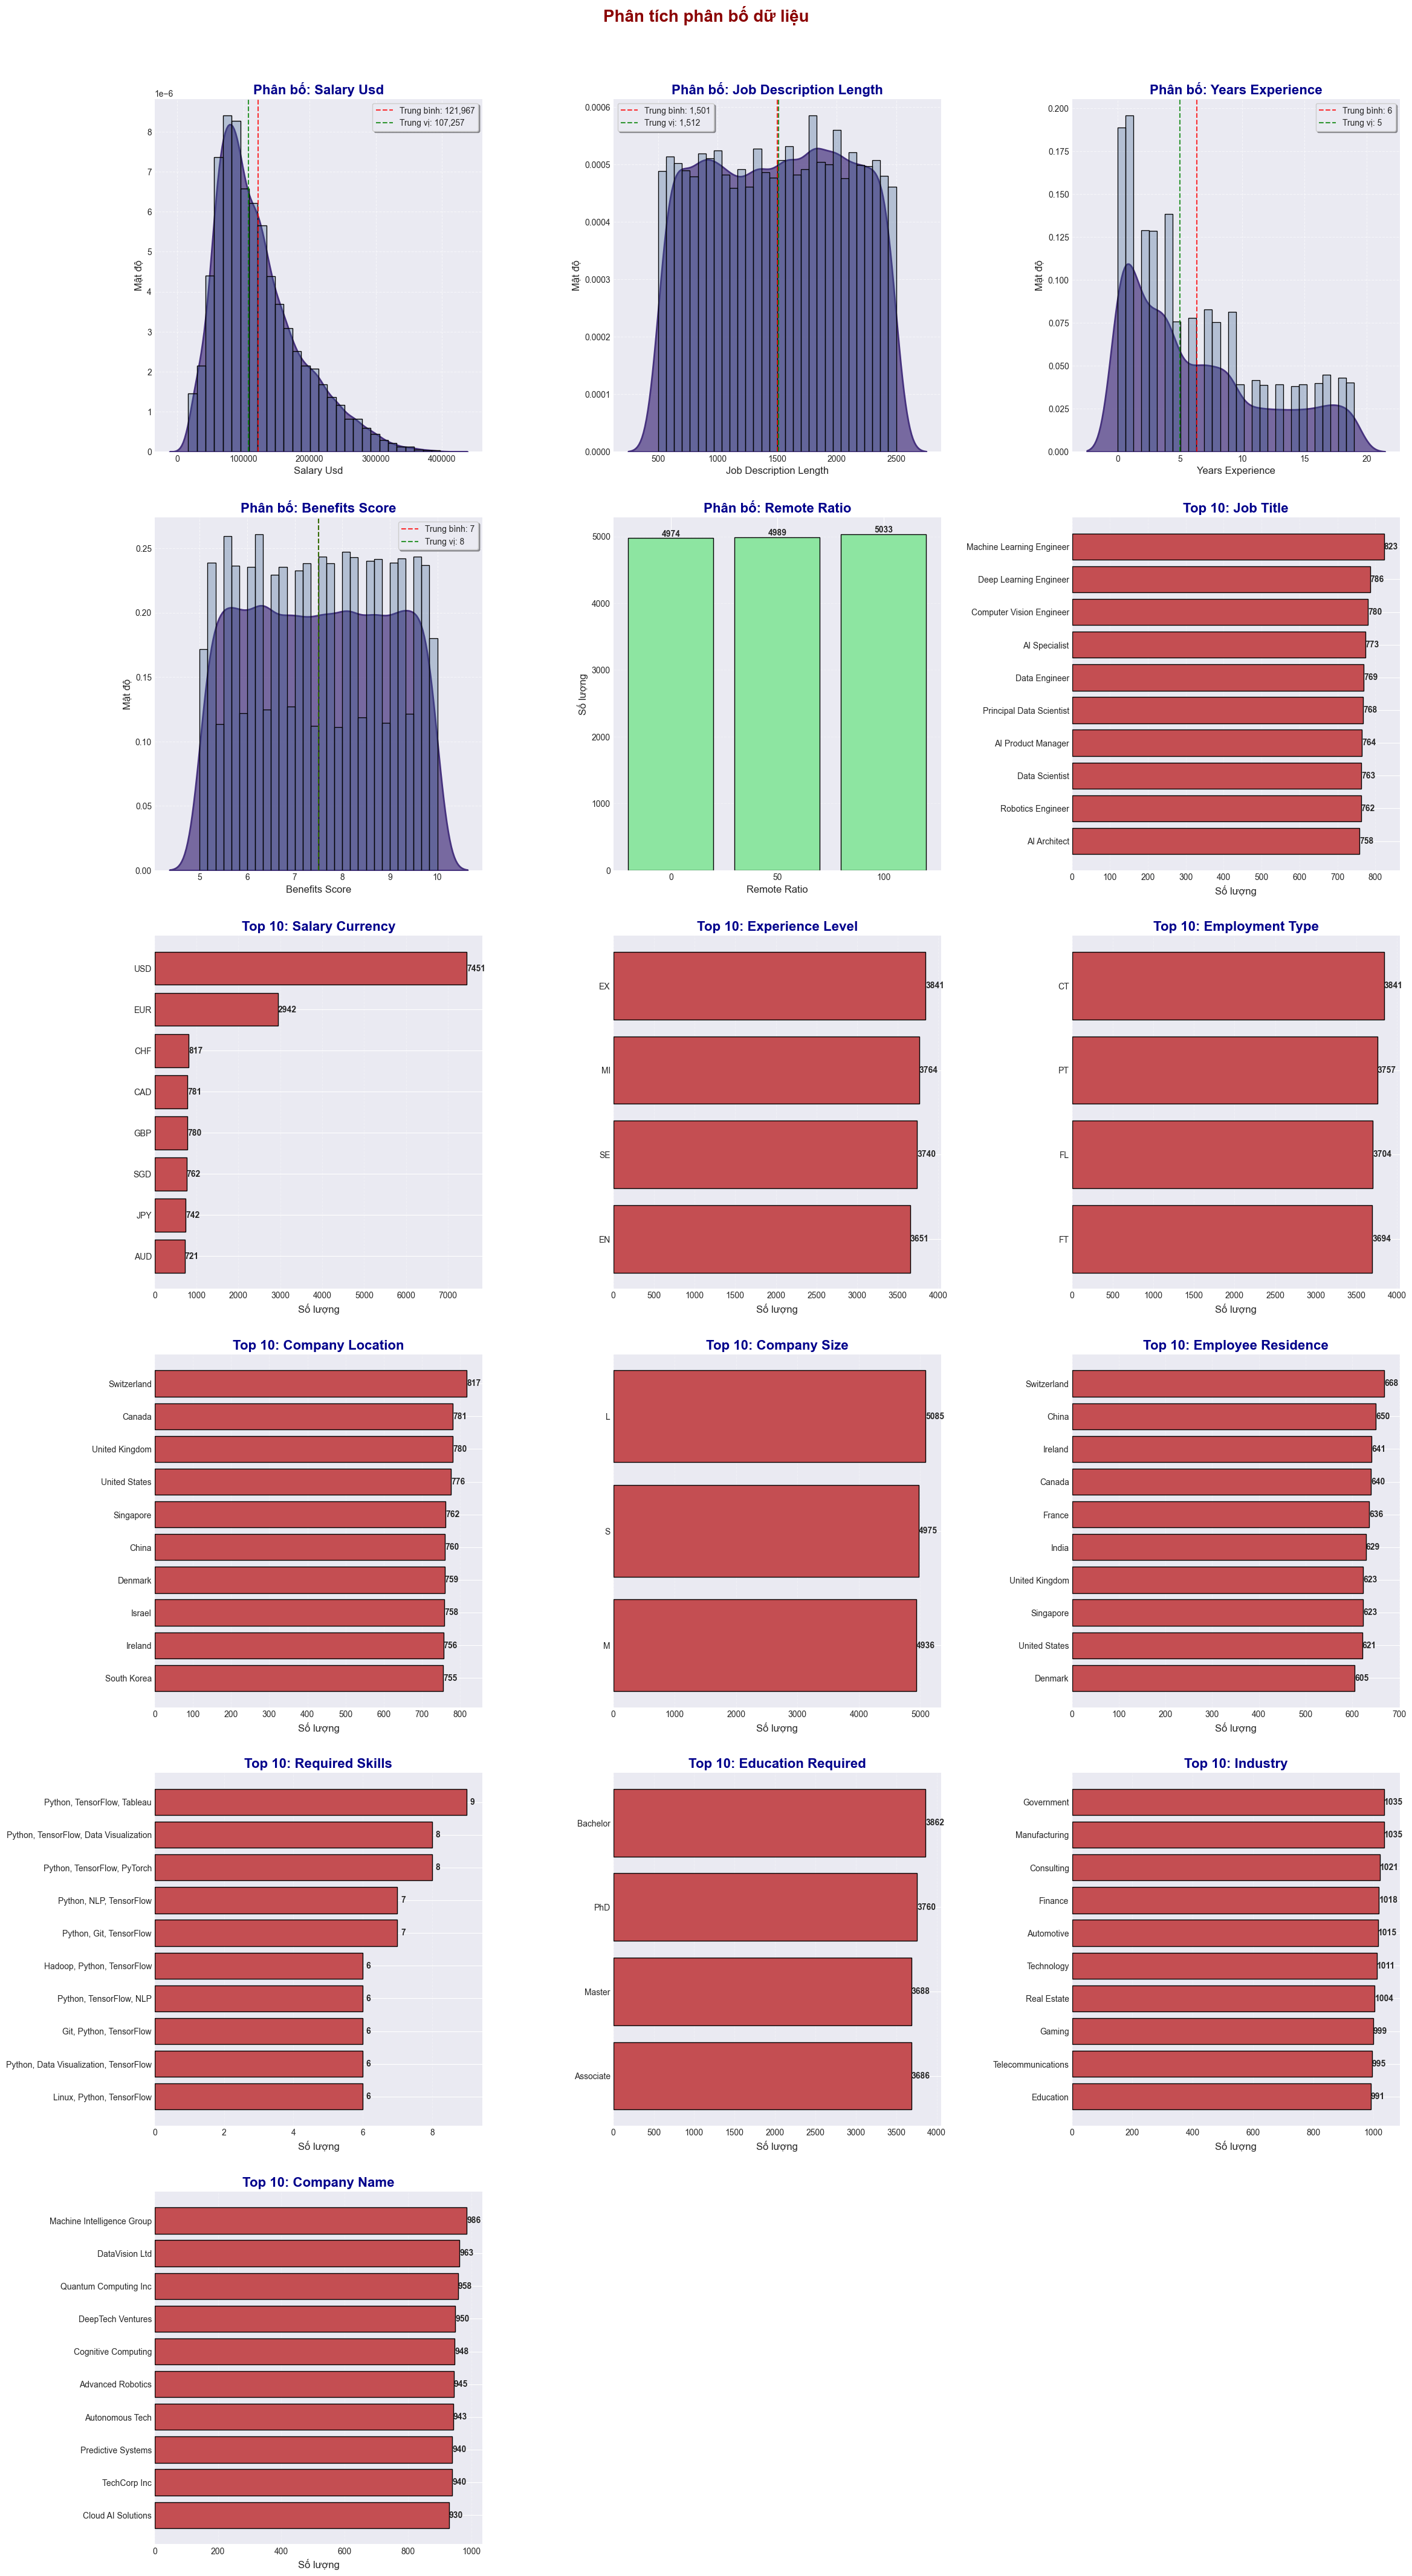

In [11]:
# Định nghĩa các cột
str_columns = [col for col in df.select_dtypes(include=['object']).columns if col != 'job_id']
continuous_columns = ['salary_usd', 'job_description_length', 'years_experience', 'benefits_score']
discrete_column = ['remote_ratio']

# Tổng số biểu đồ cần vẽ
total_plots = len(continuous_columns) + len(discrete_column) + len(str_columns)

# Tính số dòng cần thiết (3 cột mỗi dòng)
n_rows = math.ceil(total_plots / 3)

# Cải thiện: Sử dụng style của seaborn để có giao diện đẹp hơn
# Đảm bảo seaborn đã được import (ví dụ: import seaborn as sns)
# và matplotlib.pyplot đã được import (ví dụ: import matplotlib.pyplot as plt)
plt.style.use('seaborn-v0_8-darkgrid') # Hoặc 'ggplot', 'fivethirtyeight' để thử các phong cách khác

# Tạo figure với subplot
# Cải thiện: Tăng kích thước figure để biểu đồ rõ ràng hơn và có không gian hơn
fig, axes = plt.subplots(n_rows, 3, figsize=(24, 7 * n_rows)) # Tăng chiều rộng và chiều cao
axes = axes.flatten()  # Chuyển thành mảng 1 chiều để dễ truy cập

# Đếm vị trí hiện tại
plot_idx = 0

# 1. Vẽ KDE plot cho các biến continuous
for col in continuous_columns:
    if plot_idx < len(axes):
        ax = axes[plot_idx]
        # Cải thiện: Sử dụng sns.kdeplot và sns.histplot để tận dụng các tính năng của seaborn
        # Sử dụng màu sắc từ palette của seaborn để có sự nhất quán và hấp dẫn hơn
        sns.kdeplot(df[col], ax=ax, fill=True, color=sns.color_palette("viridis")[0], alpha=0.7, linewidth=2)
        
        # Thêm histogram mờ phía sau để thấy distribution rõ hơn
        sns.histplot(df[col], ax=ax, bins=30, alpha=0.3, color=sns.color_palette("viridis")[1], stat='density', kde=False)
        
        # Cải thiện: Tiêu đề rõ ràng hơn, font lớn hơn, màu sắc đậm hơn
        ax.set_title(f'Phân bố: {col.replace("_", " ").title()}', fontsize=16, fontweight='bold', color='darkblue')
        # Cải thiện: Kích thước chữ cho nhãn trục
        ax.set_xlabel(col.replace('_', ' ').title(), fontsize=12)
        ax.set_ylabel('Mật độ', fontsize=12)
        # Cải thiện: Kích thước chữ cho các giá trị trên trục
        ax.tick_params(axis='both', which='major', labelsize=10)
        # Cải thiện: Kiểu lưới rõ ràng hơn
        ax.grid(True, linestyle='--', alpha=0.6)
        
        # Thêm vertical line cho mean và median
        mean_val = df[col].mean()
        median_val = df[col].median()
        # Cải thiện: Alpha cao hơn cho đường trung bình/trung vị
        ax.axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'Trung bình: {mean_val:,.0f}')
        ax.axvline(median_val, color='green', linestyle='--', alpha=0.8, label=f'Trung vị: {median_val:,.0f}')
        # Cải thiện: Legend đẹp hơn với khung và đổ bóng
        ax.legend(fontsize=10, frameon=True, shadow=True)
        
        plot_idx += 1

# 2. Vẽ bar plot cho biến discrete (remote_ratio)
for col in discrete_column:
    if plot_idx < len(axes):
        ax = axes[plot_idx]
        # Đếm tần suất của từng giá trị
        value_counts = df[col].value_counts().sort_index()
        
        # Cải thiện: Sử dụng màu sắc khác từ palette và thêm viền cho các cột
        bars = ax.bar(value_counts.index.astype(str), value_counts.values, color=sns.color_palette("pastel")[2], edgecolor='black')
        ax.set_title(f'Phân bố: {col.replace("_", " ").title()}', fontsize=16, fontweight='bold', color='darkblue')
        ax.set_xlabel(col.replace('_', ' ').title(), fontsize=12)
        ax.set_ylabel('Số lượng', fontsize=12)
        ax.tick_params(axis='both', which='major', labelsize=10)
        ax.grid(True, alpha=0.3, axis='y', linestyle='--')
        
        # Thêm giá trị trên mỗi cột
        for bar in bars:
            yval = bar.get_height()
            # Cải thiện: Vị trí và font của giá trị trên cột
            ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=10, fontweight='bold')
        
        plot_idx += 1

# 3. Vẽ horizontal bar plot cho các biến string
for col in str_columns:
    if plot_idx < len(axes):
        ax = axes[plot_idx]
        # Lấy top 10 giá trị phổ biến nhất và sắp xếp tăng dần để dễ đọc
        top_values = df[col].value_counts().head(10).sort_values(ascending=True)
        
        # Vẽ horizontal bar plot
        y_pos = range(len(top_values))
        # Cải thiện: Màu sắc và viền cho các thanh
        bars = ax.barh(y_pos, top_values.values, color=sns.color_palette("deep")[3], edgecolor='black')
        ax.set_yticks(y_pos)
        ax.set_yticklabels(top_values.index, fontsize=10)
        ax.set_title(f'Top 10: {col.replace("_", " ").title()}', fontsize=16, fontweight='bold', color='darkblue')
        ax.set_xlabel('Số lượng', fontsize=12)
        ax.tick_params(axis='x', which='major', labelsize=10)
        ax.grid(True, alpha=0.3, axis='x', linestyle='--')
        
        # Thêm giá trị trên các thanh
        for bar in bars:
            xval = bar.get_width()
            # Cải thiện: Vị trí và font của giá trị trên thanh
            ax.text(xval + 0.1, bar.get_y() + bar.get_height()/2, int(xval), va='center', fontsize=10, fontweight='bold')
        
        plot_idx += 1

# Ẩn các subplot thừa
for idx in range(plot_idx, len(axes)):
    axes[idx].axis('off')

# Điều chỉnh layout
# Cải thiện: Thêm padding giữa các subplot
plt.tight_layout(pad=3.0)
# Cải thiện: Thêm tiêu đề chung cho toàn bộ figure
plt.suptitle('Phân tích phân bố dữ liệu', y=1.02, fontsize=20, fontweight='bold', color='darkred')
plt.show()


**Nhận xét về mặt dữ liệu**: 
- Dữ liệu có vẻ như không bị lỗi gì, tuy nhiên nếu ta chú ý vào cột required_skills thì ta nhân thấy rằng khi phản ảnh lên biểu đồ cột ngang thì có vẻ như nó chưa thể hiện đúng bản chất vấn đề. Ta cần tách chúng ra để dễ dàng phân tích 

**Nhận xét chung về mặt phân tích**:
- Đối với cột salary_usd, lương có xu hướng tập trung nhiều 70-90k USD/Năm. So với mặt bằng chung thì là cao.
- Đối với cột years_experience thì kinh nghiệm các công ty tuyển dụng nói chung thì đang tập trung tìm kiếm các ứng viên là thực tập sinh. Cơ bản mà nói thì các nghành về dữ liệu/trí tuệ nhân tạo cũng chỉ mới phát triển mạnh vào những năm gần đây
- Các biểu đồ khác khá đồng đều nhau, cho thấy nhu câu tuyển dụng phân bổ khá đồng đều. Tuy vậy, tôi tập trung vào biểu đồ Experience Level thì tôi nhận thấy rằng: mặc dù ở trên như ta thấy thì vị trí 0 year-exp chiếm nhiều nhất. Tuy vậy ở biểu đồ Experience Level thì MI (Level trung cấp) đang chiếm nhiều nhất, theo logic của tôi thì EN (Entry Level) lẽ ra phải nhiều nhất chứ. Có lẽ điều này tôi sẽ kiểm tra sau

### Công việc tiếp theo: tách bảng ban đầu thành 2 bảng: bảng chứa chỉ chứa job_id, required_skills (tuy nhiên dữ liệu đã được chuẩn) và bảng chứa tất cả các trường ngoại trừ required_skills 

In [12]:
# Tạo DataFrame mới chứa job_id và required_skills
skill_df = df[['job_id','required_skills']].copy() 
skill_df['required_skills'] = skill_df['required_skills'].str.split(',')
skill_df['required_skills'] = skill_df['required_skills'].apply(lambda x: [skill.title().strip() for skill in x])
skill_df = skill_df.explode(column='required_skills')
skill_df = pd.DataFrame(skill_df)
# Dataframe không chứa required_skills
new_df = df.drop(columns=['required_skills'])

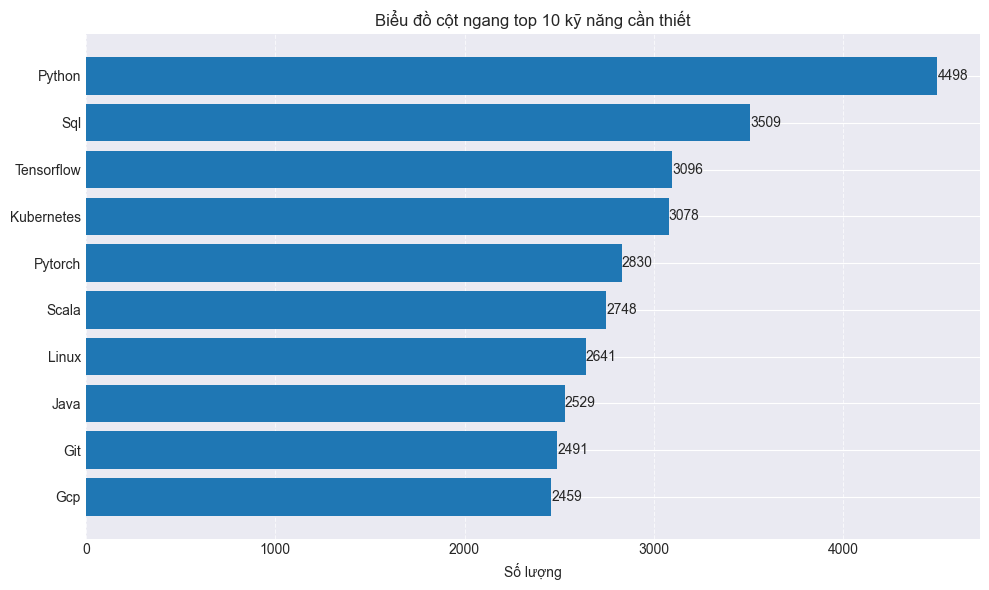

In [13]:

frequency = skill_df['required_skills'].value_counts().head(10)

# Chuẩn bị dữ liệu cho biểu đồ
categories = frequency.index.tolist() # Lấy các tên danh mục từ index của Series
values = frequency.values.tolist()    # Lấy các giá trị tần suất

# --- Phần vẽ biểu đồ cột ngang (tương tự như ví dụ trước) ---
fig, ax = plt.subplots(figsize=(10, 6))

# Vẽ biểu đồ cột ngang
bars = ax.barh(np.arange(len(categories)), values)

# Đặt nhãn cho trục y (các cột chữ)
ax.set_yticks(np.arange(len(categories)))
ax.set_yticklabels(categories)

# Đảo ngược trục y để cột đầu tiên hiển thị ở trên cùng
ax.invert_yaxis()

# Thêm nhãn giá trị vào cuối mỗi cột
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.5, bar.get_y() + bar.get_height()/2,
            f'{width}',
            ha='left', va='center')

# Đặt tiêu đề và nhãn trục
ax.set_xlabel('Số lượng')
ax.set_title('Biểu đồ cột ngang top 10 kỹ năng cần thiết')

# Hiển thị lưới
ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


**Insight**: Python vẫn luôn là kỹ năng quan trọng trong nghành khoa học dữ liệu nói chung và lập trình nói riêng. Bên cạnh đó, SQL cũng quan trọng không kém. Tensorflow cũng nổi trội tuy nhiên chỉ phù hợp với các vị trí như ML, AI, ...

## **Dashboard 1: Tổng quan toàn cảnh thị trường**

### **Dashboard dành cho**: các nhà quản lý, lãnh đạo
### **Câu hỏi**: các nhà quản lý, lãnh đạo quan tâm đến điều gì ?
#### 1. Phân Tích Cạnh Tranh về Lương Thưởng (Compensation & Competitive Analysis)

**Câu hỏi kinh doanh**:
+ Chúng ta đang trả lương có cạnh tranh không?
+ Chúng ta nên đặt ngân sách lương thưởng như thế nào cho các vị trí và thị trường khác nhau?

#### 2. Hoạch Định Kỹ Năng và Nguồn Lực (Skills & Workforce Planning)

**Câu hỏi kinh doanh**:
+ Chúng ta cần tập trung và đào tạo những kỹ năng nào cho nhân viên ?
+ Phúc lợi tương ứng đối với từng vị trí cho nhân viên ?

#### 3. Phân Tích Mô Hình Làm Việc và Địa Lý (Work Model & Geo Analysis)

**Câu hỏi kinh doanh**:
+ Mỏ vàng nhân tài đang nằm ở đâu ?
+ Có nên mở rộng mô hình làm việc của công ty ?

### **1. Phân tích cạnh tranh về lương thưởng**

#### Đầu tiên, tôi cần xác định xem cái vấn đề ở trên của tôi: có đúng là năm kinh nghiệm có mối quan hệ với experience level không

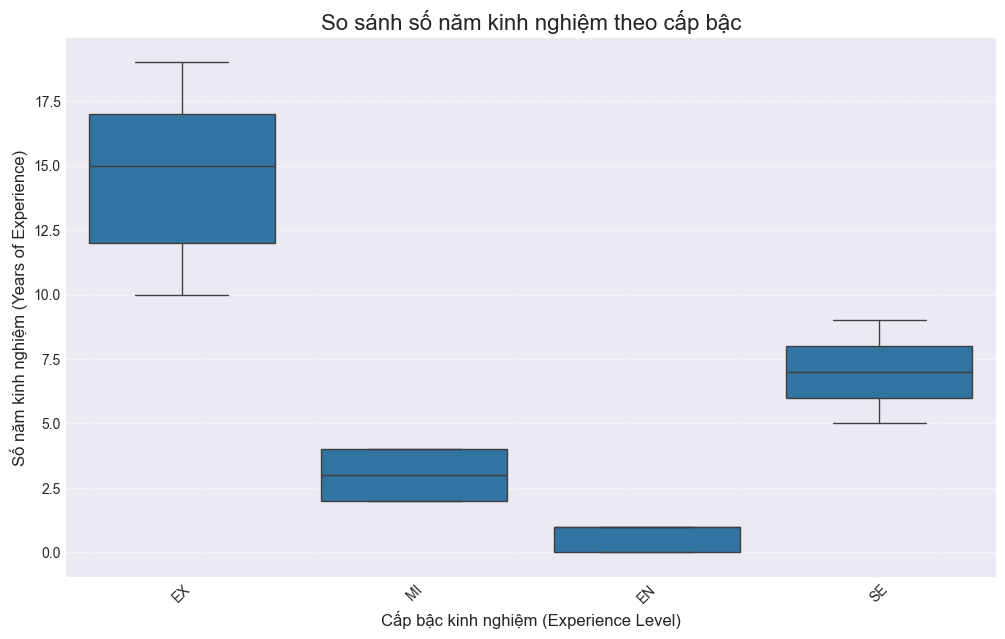

In [14]:

plt.figure(figsize=(12, 7))
# Thay bằng sns.violinplot
sns.boxplot(x='experience_level', y='years_experience', data=df)

plt.title('So sánh số năm kinh nghiệm theo cấp bậc', fontsize=16)
plt.xlabel('Cấp bậc kinh nghiệm (Experience Level)', fontsize=12)
plt.ylabel('Số năm kinh nghiệm (Years of Experience)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Như ta thấy ở đây**:
1. Mức độ entry (E): thường nằm ở mức kinh nghiệm là từ 0 đến 1 (hoặc 2)
2. Mức độ trung cấp (M): Có số năm kinh nghiệm khoảng từ 2.5 đến 4 (hoặc 5)
3. Mức độ cao cấp (SE): có só năm kinh nghiệm trong khoảng từ 6 đến 8 năm (có một số ngoại lệ nằm trong khoảng từ 5 đến 9)
4. Mức độ cao cấp (EX): có số năm kinh nghiệm rơi vào từ 10+

**Điều đó có ý nghĩa gì ?**
1. Việc xác định mối quan hệ giữa số năm kinh nghiệm và trình độ tương ứng có thể giúp cho doanh nghiệp xác định được mức độ phù hợp cho ứng viên. Từ đó có thể chọn được chính sách lương thưởng cho đúng đắn
2. Việc xác định rõ mối quan hệ này cũng giúp cho doanh nghiệp dễ dàng đánh giá người lao động và xếp hạng cho họ tương ứng. Đồng thời có những chính sách đãi ngộ cũng như là chính sách training phù hợp cho từng vị trí kinh nghiệm làm việc

#### Tiếp theo, tôi quan tâm đến số tiền lương trung bình cho từng vị trí là như thế nào ?

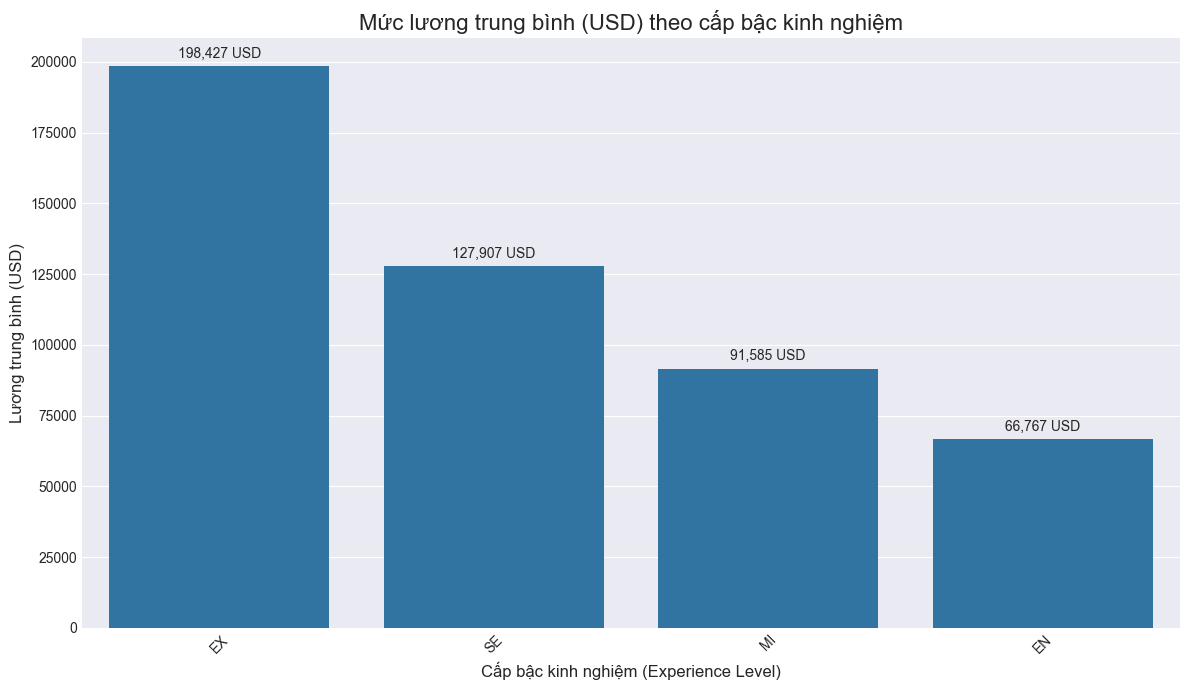

In [15]:
avg_salary_each_exp = df.groupby('experience_level')['salary_usd'].mean().sort_values(ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(12, 7))
barplot = sns.barplot(x=avg_salary_each_exp.index, y=avg_salary_each_exp.values)

# Thêm nhãn giá trị trên mỗi cột để dễ đọc
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), ',.0f') + ' USD', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Đặt tiêu đề và nhãn
plt.title('Mức lương trung bình (USD) theo cấp bậc kinh nghiệm', fontsize=16)
plt.xlabel('Cấp bậc kinh nghiệm (Experience Level)', fontsize=12)
plt.ylabel('Lương trung bình (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout() # Tự động điều chỉnh cho vừa vặn
plt.show()

**Ta có nhận xét sau**:

Mức độ tăng trưởng lương rất cao qua các cấp bậc: từ vị trí EN đến EX, lương trung bình tăng gần 3x (từ $63K lên $188K). Để dễ hình dung, nếu kinh nghiệm của bạn tích lũy được thêm 9 năm, số tiền của bạn tương ứng tâng lên 3 lần. Tuy nhiên, cũng cần lưu ý rằng số năm kinh nghiệm không đảm bảo hoàn toàn rằng việc bạn có thể được tăng lương như vậy vì nó còn phụ thuộc nhiều vào các yếu tố khác nữa như: kỹ năng, hiệu suất, ...  

**Dựa vào biểu đồ trên, các nhà quản lý có thể"**
+ Cho nhân viên thấy được potential growth, tạo động lực cho nhân viên
+ Xác định được khoảng lương cụ thể cho từng vị trí
+ Dễ dàng tìm kiếm các ứng viên phù hợp dựa vào tình hình tài chính của công ty


#### Việc dựa vào vị trí để xác định mỗi lương thưởng nói chung là chưa đủ, có lẽ để hợp lý hơn. Ta cần chia theo cả loại hình công việc, quy mô công ty và theo quốc gia

**Công việc này sẽ được thực hiện ở trên power bi**

### **2. Hoạch Định Kỹ Năng và Nguồn Lực**

Như tôi đã phân tích tổng quan trước đó thì các kỹ năng được các nhà tuyển dụng tìm kiếm hàng nhiều nhất ở vị trí hiện tại đang là Python. Tiếp theo đó là SQL, Tensorflow, .... Bây giờ, ta cùng phân tích kỹ hơn chút

#### Giải quyết vấn đề 1: Ta cần tập trung những kỹ năng nào cho nhân viên ?

Đầu tiên ta cần phân rã từng nghành tương ứng (trong power bi ta sẽ dùng bộ lọc)

In [16]:
all_table =  new_df.merge(skill_df,left_on='job_id',right_on='job_id',how='inner')

In [17]:

job_titles = sorted(all_table['job_title'].unique())

# --- BƯỚC 2: TẠO HÀM ĐỂ VẼ BIỂU ĐỒ CHO MỘT NGÀNH NGHỀ DUY NHẤT ---
# Hàm này sẽ được gọi mỗi khi bạn thay đổi lựa chọn trong dropdown
def plot_skills_for_job(job_title):
    # Lọc dữ liệu cho ngành nghề được chọn
    job_skills = all_table[all_table['job_title'] == job_title]
    
    # Đếm top 10 kỹ năng
    top_10_skills = job_skills['required_skills'].value_counts().nlargest(10)
    
    # Vẽ biểu đồ
    plt.figure(figsize=(10, 7))
    sns.barplot(x=top_10_skills.values, y=top_10_skills.index)
    
    # Tinh chỉnh biểu đồ
    plt.title(f'Top 10 Kỹ năng Quan trọng cho: {job_title}', fontsize=16)
    plt.xlabel('Số lượng yêu cầu', fontsize=12)
    plt.ylabel('Kỹ năng', fontsize=12)
    plt.tight_layout()
    plt.show()

# --- BƯỚC 3: TẠO VÀ HIỂN THỊ BỘ LỌC TƯƠNG TÁC ---
# widgets.interactive sẽ kết nối hàm plot_skills_for_job với dropdown
# Mỗi giá trị trong dropdown sẽ được truyền vào tham số 'job_title' của hàm
interactive_plot = widgets.interactive(
    plot_skills_for_job, 
    job_title=widgets.Dropdown(options=job_titles, description='Chọn Ngành:')
)

# Hiển thị bộ lọc và khu vực biểu đồ
display(interactive_plot)

interactive(children=(Dropdown(description='Chọn Ngành:', options=('AI Architect', 'AI Consultant', 'AI Produc…

Chưa dừng lại ở đó, ta sẽ tìm bộ kỹ năng "vàng": top 10 kỹ năng được trả lương cao nhất

In [18]:
skill_salary_analysis = all_table.groupby('required_skills')['salary_usd'].agg(['mean', 'median', 'count'])
skill_salary_analysis = skill_salary_analysis.sort_values(by='mean', ascending=False)

# Lọc ra những kỹ năng có 'count' lớn hơn hoặc bằng ngưỡng
significant_skills = skill_salary_analysis[skill_salary_analysis['count'] >= 5]

# Sắp xếp lại sau khi đã lọc
top_paying_skills = significant_skills.sort_values(by='mean', ascending=False)

# Làm cho bảng trông đẹp hơn
styled_table = top_paying_skills.head(10).style.format({
    'mean': '${:,.0f}',
    'median': '${:,.0f}'
}).set_caption('Top 10 Kỹ năng được trả lương cao nhất (USD)')

display(styled_table)


,mean,median,count
required_skills,,,
Hadoop,"$123,485","$108,470",2342
Scala,"$123,271","$106,666",2748
Python,"$123,137","$109,790",4498
Spark,"$123,123","$108,582",2264
Docker,"$122,710","$107,752",1907
Data Visualization,"$122,604","$107,548",2274
R,"$122,600","$106,811",2346
Azure,"$122,345","$105,956",2136
Pytorch,"$122,332","$106,964",2830


**Dựa vào các biểu đồ trên, các nhà quản lý lãnh đạo có thể**:
- Lên phương án đào tạo cho nhân viên
- Nắm bắt được xu hướng của thị trường (phát triển theo hướng công nghệ/ tự động hóa/ ...)

#### Giải quyết vấn đề 2: Phúc lợi tương ứng đối với từng vị trí

In [19]:
def get_options_with_all(column_name):
    """Hàm helper để lấy các giá trị duy nhất và thêm 'Tất cả' vào đầu"""
    options = ['Tất cả'] + sorted(new_df[column_name].unique().tolist())
    return options

# Tạo các dropdown widget
industry_widget = widgets.Dropdown(options=get_options_with_all('industry'), description='Ngành:')
job_category_widget = widgets.Dropdown(options=get_options_with_all('job_title'), description='Loại CV:')
experience_level_widget = widgets.Dropdown(options=get_options_with_all('experience_level'), description='Cấp bậc:')


def display_benefit_score_card(industry, job_category, experience_level):
    
    # Lọc DataFrame dựa trên lựa chọn từ widgets
    filtered_df = new_df.copy()
    
    if industry != 'Tất cả':
        filtered_df = filtered_df[filtered_df['industry'] == industry]
        
    if job_category != 'Tất cả':
        filtered_df = filtered_df[filtered_df['job_title'] == job_category]
        
    if experience_level != 'Tất cả':
        filtered_df = filtered_df[filtered_df['experience_level'] == experience_level]
        
    # Tính toán điểm trung bình
    if not filtered_df.empty:
        avg_score = filtered_df['benefits_score'].mean()
        score_text = f"{avg_score:.2f}"
        num_jobs = len(filtered_df)
        footer_text = f"Dựa trên {num_jobs} tin tuyển dụng"
    else:
        score_text = "N/A" # Không có dữ liệu
        footer_text = "Không có dữ liệu phù hợp"
        
    # Vẽ card bằng matplotlib
    fig, ax = plt.subplots(figsize=(4, 2))
    fig.patch.set_facecolor('#f0f0f0') # Màu nền cho card
    
    # Hiển thị giá trị chính
    ax.text(0.5, 0.6, score_text, 
            ha='center', va='center', 
            fontsize=40, fontweight='bold', color='#007acc')
    
    # Hiển thị tiêu đề
    ax.text(0.5, 0.9, 'Điểm Phúc lợi Trung bình', 
            ha='center', va='center', 
            fontsize=14)

    # Hiển thị footer
    ax.text(0.5, 0.1, footer_text, 
            ha='center', va='center', 
            fontsize=10, color='grey')
            
    # Ẩn các trục
    ax.axis('off')
    plt.show()


# widgets.interactive sẽ theo dõi sự thay đổi của các widget
interactive_card = widgets.interactive(
    display_benefit_score_card,
    industry=industry_widget,
    job_category=job_category_widget,
    experience_level=experience_level_widget
)

# Hiển thị các bộ lọc và khu vực card
display(interactive_card)

interactive(children=(Dropdown(description='Ngành:', options=('Tất cả', 'Automotive', 'Consulting', 'Education…

**Dựa vào card trên, các nhà quản lý có thể:**
- Thay đổi các chính sách đãi ngộ của công ty để tìm kiếm các nhân tài: tăng lương thưởng, tổ chức nhiều hoạt động vui chơi hàng tháng/quý hơn,...
- Tạo thế cạnh tranh cho công ty trên thị trường lao động

### **3. Phân tích mô hình làm việc và địa lý**

#### Giải quyết vấn đề 1: Mỏ vàng nhân tài nằm ở đâu ?

1. Đếm số lượng tuyển dụng nhân viên trong nghành AI/Data theo employee_residence

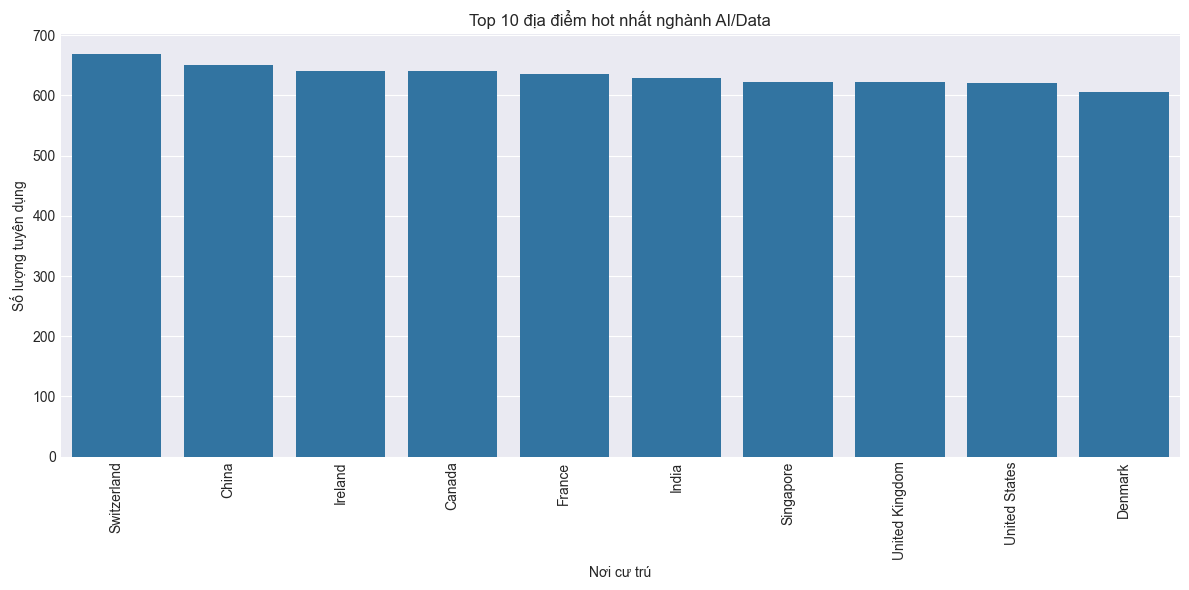

In [20]:
plt.figure(figsize=(12, 6)) # Tùy chỉnh kích thước biểu đồ cho dễ nhìn
sns.countplot(x='employee_residence', data=new_df, order=new_df['employee_residence'].value_counts().sort_values(ascending=False).index[:10])
plt.title('Top 10 địa điểm hot nhất nghành AI/Data')
plt.xlabel('Nơi cư trú')
plt.ylabel('Số lượng tuyên dụng')
plt.xticks(rotation=90) # Xoay nhãn trục x nếu có nhiều quốc gia
plt.tight_layout() # Điều chỉnh bố cục để tránh nhãn bị cắt
plt.show()

**Biểu đồ trên giúp các nhà quản lý**: Biết đâu là "điểm nóng AI", xem xét cơ hội cạnh tranh (nếu có)


2. Phân tích điểm nóng và chi phí tương ứng phải chi trả

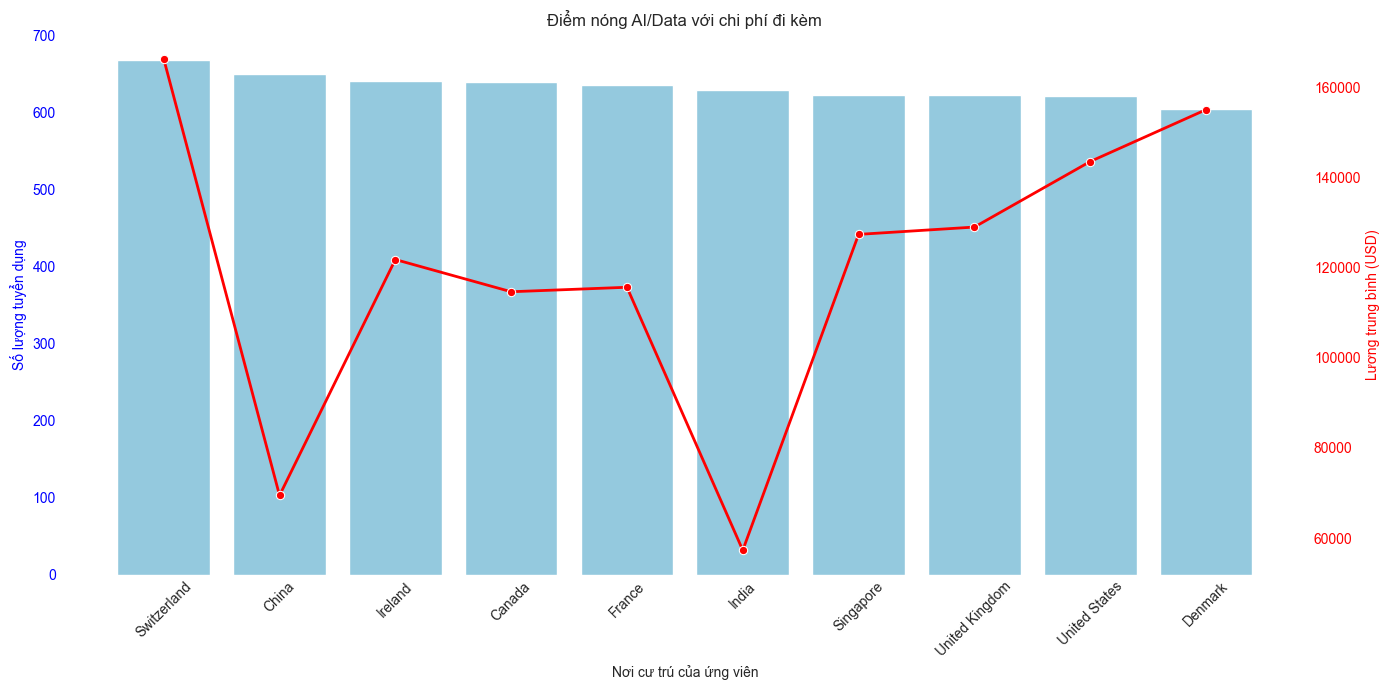

In [21]:

# Thiết lập kiểu biểu đồ Seaborn thành 'white' để loại bỏ nền và đường lưới
sns.set_style('white')

value_analysis = new_df.groupby('employee_residence')['salary_usd'].agg(['count', 'mean']).round(0)
# Lọc ra những nơi có ít nhất 5 nhân tài để kết quả đáng tin cậy
value_analysis_significant = value_analysis[value_analysis['count'] >= 5]
# Sắp xếp DataFrame để biểu đồ dễ đọc hơn (lấy top 10 theo count)
value_analysis_significant_sorted = value_analysis_significant.sort_values(by='count', ascending=False).head(10)

# Tạo figure và trục chính (ax1) cho biểu đồ cột
fig, ax1 = plt.subplots(figsize=(14, 7))

# Vẽ biểu đồ cột cho số lượng (count) với màu đơn giản
sns.barplot(x='employee_residence', y='count', data=value_analysis_significant_sorted, ax=ax1, color='skyblue')
ax1.set_xlabel('Nơi cư trú của ứng viên')
ax1.set_ylabel('Số lượng tuyển dụng', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Điểm nóng AI/Data với chi phí đi kèm')
ax1.tick_params(axis='x', rotation=45) # Xoay nhãn trục x để tránh chồng chéo

# Tạo trục y thứ hai (ax2) chia sẻ trục x với ax1
ax2 = ax1.twinx()

# Vẽ biểu đồ đường cho lương trung bình (mean)
sns.lineplot(x='employee_residence', y='mean', data=value_analysis_significant_sorted, ax=ax2, color='red', marker='o', linewidth=2)
ax2.set_ylabel('Lương trung bình (USD)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.ticklabel_format(style='plain', axis='y') # Loại bỏ ký hiệu khoa học nếu có

# Điều chỉnh bố cục và hiển thị biểu đồ
plt.tight_layout()
plt.show()


**Ở đây ta thấy**
- China/India là một trong những điểm nóng công nghệ trên thế giới. Mà hơn nữa, chi phí như ta thấy là thấp nhất -> Thế nên nhà lãnh đạo có thể tập trung vào thị trường này. Một lựa chọn khác là ở thị trường ấn độ

3. Các chuyên gia đầu nghành họ ở đâu ?

In [22]:
exp_filter = sorted(new_df['experience_level'].unique())

def my_plot(exp_input):
    # Đảm bảo exp_input là một list hoặc tuple, ngay cả khi chỉ chọn một giá trị
    # SelectMultiple luôn trả về một tuple, nhưng kiểm tra này an toàn hơn
    if not isinstance(exp_input, (list, tuple)):
        exp_input = [exp_input]

    # Lọc DataFrame dựa trên nhiều cấp độ kinh nghiệm được chọn
    # Sử dụng .isin() để kiểm tra xem giá trị có nằm trong list các lựa chọn không
    df_temp = new_df[new_df['experience_level'].isin(exp_input)].copy()

    plt.figure(figsize=(12, 6))

    if not df_temp.empty:
        # Lấy top 10 địa điểm hot nhất theo số lượng nhân viên
        # Sắp xếp lại theo số lượng giảm dần
        top_10_locations = df_temp['employee_residence'].value_counts().sort_values(ascending=False).index[:10]
        sns.countplot(x='employee_residence', data=df_temp, order=top_10_locations, color='skyblue')
        # Tiêu đề biểu đồ động, hiển thị các cấp độ kinh nghiệm đã chọn
        # Chuyển đổi tuple/list exp_input thành chuỗi để hiển thị
        title_exp = ', '.join(exp_input) if exp_input else 'Tất cả'
        plt.title(f'Top 10 địa điểm hot nhất ngành AI/Data cho cấp độ kinh nghiệm: {title_exp}')
        plt.xlabel('Nơi cư trú')
        plt.ylabel('Số lượng nhân viên')
        plt.xticks(rotation=90) # Xoay nhãn trục x để dễ đọc
        plt.tight_layout() # Điều chỉnh bố cục để tránh nhãn bị cắt
    else:
        # Hiển thị thông báo nếu không có dữ liệu cho các cấp độ kinh nghiệm này
        plt.text(0.5, 0.5, 'Không có dữ liệu cho các cấp độ kinh nghiệm này',
                 horizontalalignment='center', verticalalignment='center',
                 transform=plt.gca().transAxes, fontsize=14, color='red')
        title_exp = ', '.join(exp_input) if exp_input else 'Tất cả'
        plt.title(f'Không có dữ liệu cho cấp độ kinh nghiệm: {title_exp}')
        plt.axis('off') # Tắt trục nếu không có dữ liệu


# Tạo interactive widget với SelectMultiple để lựa chọn nhiều giá trị
interactive_plot = widgets.interactive(
    my_plot,
    exp_input = widgets.SelectMultiple(
        options=exp_filter,
        # Đặt giá trị mặc định. Chọn phần tử đầu tiên nếu exp_filter không rỗng.
        value=[exp_filter[0]] if exp_filter else [],
        description='Cấp độ kinh nghiệm:',
        disabled=False
    )
)

display(interactive_plot)


interactive(children=(SelectMultiple(description='Cấp độ kinh nghiệm:', index=(0,), options=('EN', 'EX', 'MI',…

**Công dụng biểu đồ**: Tìm kiếm được những thị trường giàu kinh nghiệm, kỹ năng và đáp ứng nhu cầu riêng của doanh nghiệp

#### Giải quyết vấn đề 2: Có nên mở rộng mô hình làm việc của công ty ?

Số lượng tuyển dụng với từng mô hình xét theo mô hình doanh nghiệp, nghành

In [23]:
sns.set_style("whitegrid")          

company_sizes = ['Tất cả'] + df['company_size'].unique().tolist()
industries    = ['Tất cả'] + df['industry'].unique().tolist()

def plot_remote_ratio_count(company_size, industry):
    d = df.copy()
    if company_size != 'Tất cả':
        d = d[d['company_size'] == company_size]
    if industry != 'Tất cả':
        d = d[d['industry'] == industry]

    plt.figure(figsize=(10, 5))
    ax = sns.countplot(data=d, x='remote_ratio',
                       order=[0, 50, 100],
                       color='steelblue')         

    ax.set_title('Phân bố mô hình làm việc', fontsize=14, pad=15)
    ax.set_xlabel('Tỷ lệ làm việc từ xa (%)')
    ax.set_ylabel('Số tin tuyển dụng')
    ax.set_xticklabels(['On-site', 'Hybrid', 'Remote'])

    for p in ax.patches:                           
        h = p.get_height()
        ax.annotate(f'{h}', (p.get_x()+p.get_width()/2, h),
                    ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

company_size_widget = widgets.Dropdown(options=company_sizes, value='Tất cả', description='Company size')
industry_widget     = widgets.Dropdown(options=industries,    value='Tất cả', description='Industry')

display(widgets.interactive(plot_remote_ratio_count,
                            company_size=company_size_widget,
                            industry=industry_widget))

interactive(children=(Dropdown(description='Company size', options=('Tất cả', 'M', 'L', 'S'), value='Tất cả'),…

Chi phí trung bình cho từng loại hình là như nào ?

In [24]:
# Lấy các giá trị duy nhất cho các bộ lọc
# Đảm bảo các giá trị này tồn tại trong new_df
industry_options = sorted(new_df['industry'].unique())
company_size_options = sorted(new_df['company_size'].unique())

def plot_remote_salary(industry_input):
    df_filtered = new_df.copy()

    # Xử lý bộ lọc industry
    # Kiểm tra nếu industry_input không rỗng và có ít nhất một lựa chọn
    if industry_input and len(industry_input) > 0:
        df_filtered = df_filtered[df_filtered['industry'].isin(industry_input)]

    plt.figure(figsize=(10, 6))

    if not df_filtered.empty:
        # Nhóm theo remote_ratio và tính mức lương trung bình
        remote_salary_analysis = df_filtered.groupby('remote_ratio')['salary_usd'].agg('mean').round(0).reset_index()
        # Chuyển đổi remote_ratio sang chuỗi và thêm '%' để hiển thị rõ ràng
        remote_salary_analysis['remote_ratio'] = remote_salary_analysis['remote_ratio'].astype(str) + '%'

        sns.barplot(x='remote_ratio', y='salary_usd', data=remote_salary_analysis, palette='viridis')
        plt.xlabel('Tỷ lệ làm việc từ xa')
        plt.ylabel('Lương trung bình (USD)')

        # Tạo tiêu đề động dựa trên các bộ lọc đã chọn
        title_parts = []
        if industry_input and len(industry_input) > 0:
            title_parts.append(f'Ngành: {', '.join(industry_input)}')
        if title_parts:
            plt.title(f'Lương trung bình theo tỷ lệ làm việc từ xa ({'; '.join(title_parts)})')
        else:
            plt.title('Lương trung bình theo tỷ lệ làm việc từ xa (Tất cả)')

        plt.ylim(bottom=0) # Đảm bảo trục y bắt đầu từ 0
        plt.tight_layout() # Điều chỉnh bố cục để tránh chồng chéo
    else:
        # Hiển thị thông báo nếu không có dữ liệu sau khi lọc
        plt.text(0.5, 0.5, 'Không có dữ liệu cho các lựa chọn này',
                 horizontalalignment='center', verticalalignment='center',
                 transform=plt.gca().transAxes, fontsize=14, color='red')
        plt.title('Không có dữ liệu')
        plt.axis('off') # Tắt trục nếu không có dữ liệu

    plt.show()

# Tạo các widget tương tác cho industry và company_size
industry_widget = widgets.SelectMultiple(
    options=industry_options,
    description='Ngành:',
    disabled=False
)

# Kết nối hàm vẽ biểu đồ với các widget
interactive_plot = widgets.interactive(
    plot_remote_salary,
    industry_input=industry_widget
)

# Hiển thị biểu đồ tương tác
display(interactive_plot)


interactive(children=(SelectMultiple(description='Ngành:', options=('Automotive', 'Consulting', 'Education', '…

**Dựa vào 2 biểu đồ trên**:
- Tùy theo từng hình thức doanh nghiệp là như nào thì dựa vào các biểu đồ được đưa ra, nhà lãnh đạo có thể đưa ra các quyết định. Giả định công ty hiện tại là công ty lĩnh vực công nghệ. Đối với lĩnh vực công nghệ thì việc làm việc từ xa là hoàn toàn khả thi có nhiều nền tảng online giúp cho các developer có thể tương tác, trao đổi với nhau và thực hiện công việc với nhau.
- Dựa vào biểu đồ đầu tiên, ta thấy được rằng số lượng tuyển dụng ở cả 3 vị trí trong nghành công nghệ là như nhau. Cho ta thấy được có vẻ xu hướng thị trường về nghành công nghệ về phong cách làm việc là khá tương đồng nhau. 
- Dựa vào biểu đồ thứ hia, ta thấy được là chi phí cho làm việc hoàn toàn remote có vẻ như là rẻ nhất. Sau đó đến on-site và đến hybrid. Ở đây, quản lý có thể dựa vào văn hóa làm việc của công ty,... để ra quyết định
- Tìm hiểu thêm về các công ty lớn trên thị trường thì ta thấy họ chuộng loại hình hybrid hơn cả. Nguyên nhân có thể là do tính chất công việc của nghành, chi phí các thứ và việc không ràng buộc on-site có thể giúp họ tiết kiệm tiền về mặt đi lại, ... cho nhân viên. Đồng thời cũng tạo môi trường thoải mái hơn cho nhân viên, giúp nhân viên tích cực cống hiến cho công ty hơn và tất nhiên cũng vẫn đảm bảo về mặt bảo mật được do nhân viên vẫn phải đến công ty

**Tuy nhiên, nếu chỉ dừng lại ở trên là chưa đủ để ra 1 quyết định cụ thể gì. Ta tìm hiểu thêm:**

1. Nâng suất của công ty có thay đổi không ? Có tạo ra các thay đổi tích cực không ?
2. Việc nếu quyết định thêm/thay đổi thì sẽ ra sao ? Các nhân viên làm theo phong cách hiện tại họ sẽ nghĩ gì ? 

### **Kết luận**
Và việc xây dựng dashboard này chủ yếu mang ý nghĩa: gợi ý, tham khảo cho các nhà quản lý mà thôi. Nếu được ra quyết định, chúng ta cũng cần tìm hiểu thêm nhiều vấn đề khác nữa như: phong cách, môi trường, văn hóa, ... của từng công ty cũng như là ở địa điểm ta làm việc thì mới có thể quyết định đúng đắn nhất

## **Kế hoạch Phân tích cho Dashboard 2: Phân tích chuyên sâu về Lương ngành AI/Data**

### **1. Mục tiêu và Đối tượng**

#### **1.1. Mục tiêu chính**
Cung cấp một bức tranh chi tiết và đa chiều về các yếu tố ảnh hưởng đến mức lương trong ngành Trí tuệ Nhân tạo (AI), giúp các bên liên quan đưa ra quyết định dựa trên dữ liệu.

#### **1.2. Đối tượng hưởng lợi**
*   **Người lao động (Người tìm việc và Sinh viên):** Hiểu rõ các yếu tố ảnh hưởng đến mức lương để có thể định hướng phát triển kỹ năng, lựa chọn con đường sự nghiệp và đàm phán lương một cách hiệu quả.
*   **Bộ phận Nhân sự (HR) và Nhà tuyển dụng:** Có dữ liệu chi tiết để xây dựng thang bảng lương cạnh tranh, đánh giá chính xác mức lương thị trường và đưa ra các chính sách đãi ngộ phù hợp nhằm thu hút và giữ chân nhân tài.

### **2. Các Câu hỏi Phân tích Trọng tâm**
Dashboard này sẽ được thiết kế để trả lời các câu hỏi sau:
1.  Những yếu tố nào có tác động lớn nhất đến mức lương? (Kinh nghiệm, Chức danh, Địa điểm)
3.  Mối quan hệ giữa số năm kinh nghiệm và mức lương tăng trưởng như thế nào?
4.  Những kỹ năng cụ thể nào giúp tối đa hóa thu nhập?

#### Trước hết, ta xem tổng quan về lương của tất cả các nghành ra sao

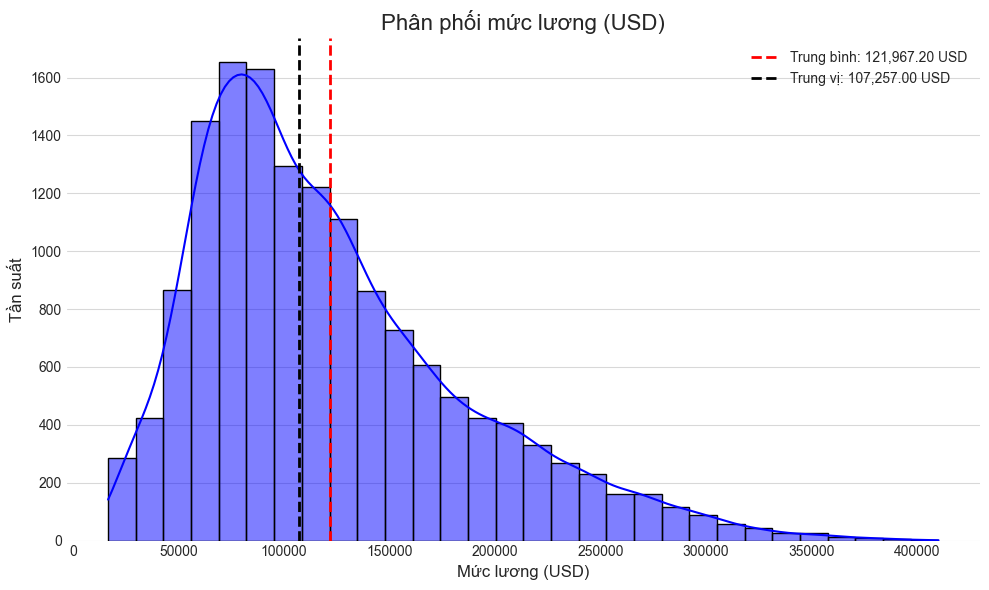

In [25]:
# Tính toán giá trị trung bình và trung vị
mean_salary = new_df['salary_usd'].mean()
median_salary = new_df['salary_usd'].median()

# Tạo biểu đồ histogram đẹp hơn
plt.figure(figsize=(10, 6)) # Điều chỉnh kích thước biểu đồ
plt.grid(visible=False)
sns.histplot(new_df['salary_usd'], bins=30, kde=True, color='blue', edgecolor='black')

# Thêm đường thẳng cho giá trị trung bình và trung vị
plt.axvline(mean_salary, color='red', linestyle='dashed', linewidth=2, label=f'Trung bình: {mean_salary:,.2f} USD')
plt.axvline(median_salary, color='black', linestyle='dashed', linewidth=2, label=f'Trung vị: {median_salary:,.2f} USD')

# Thêm tiêu đề và nhãn
plt.title('Phân phối mức lương (USD)', fontsize=16)
plt.xlabel('Mức lương (USD)', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)
plt.legend() # Hiển thị chú giải cho các đường trung bình và trung vị
plt.grid(axis='y', alpha=0.75) # Thêm lưới cho trục y
plt.tight_layout() # Tự động điều chỉnh bố cục để tránh chồng lấn
plt.show()

Phần nhận xét tôi đã nhận xét trước đó

#### Ta tìm hiểu xem là yếu tố nào sẽ có tác động đến mức lương

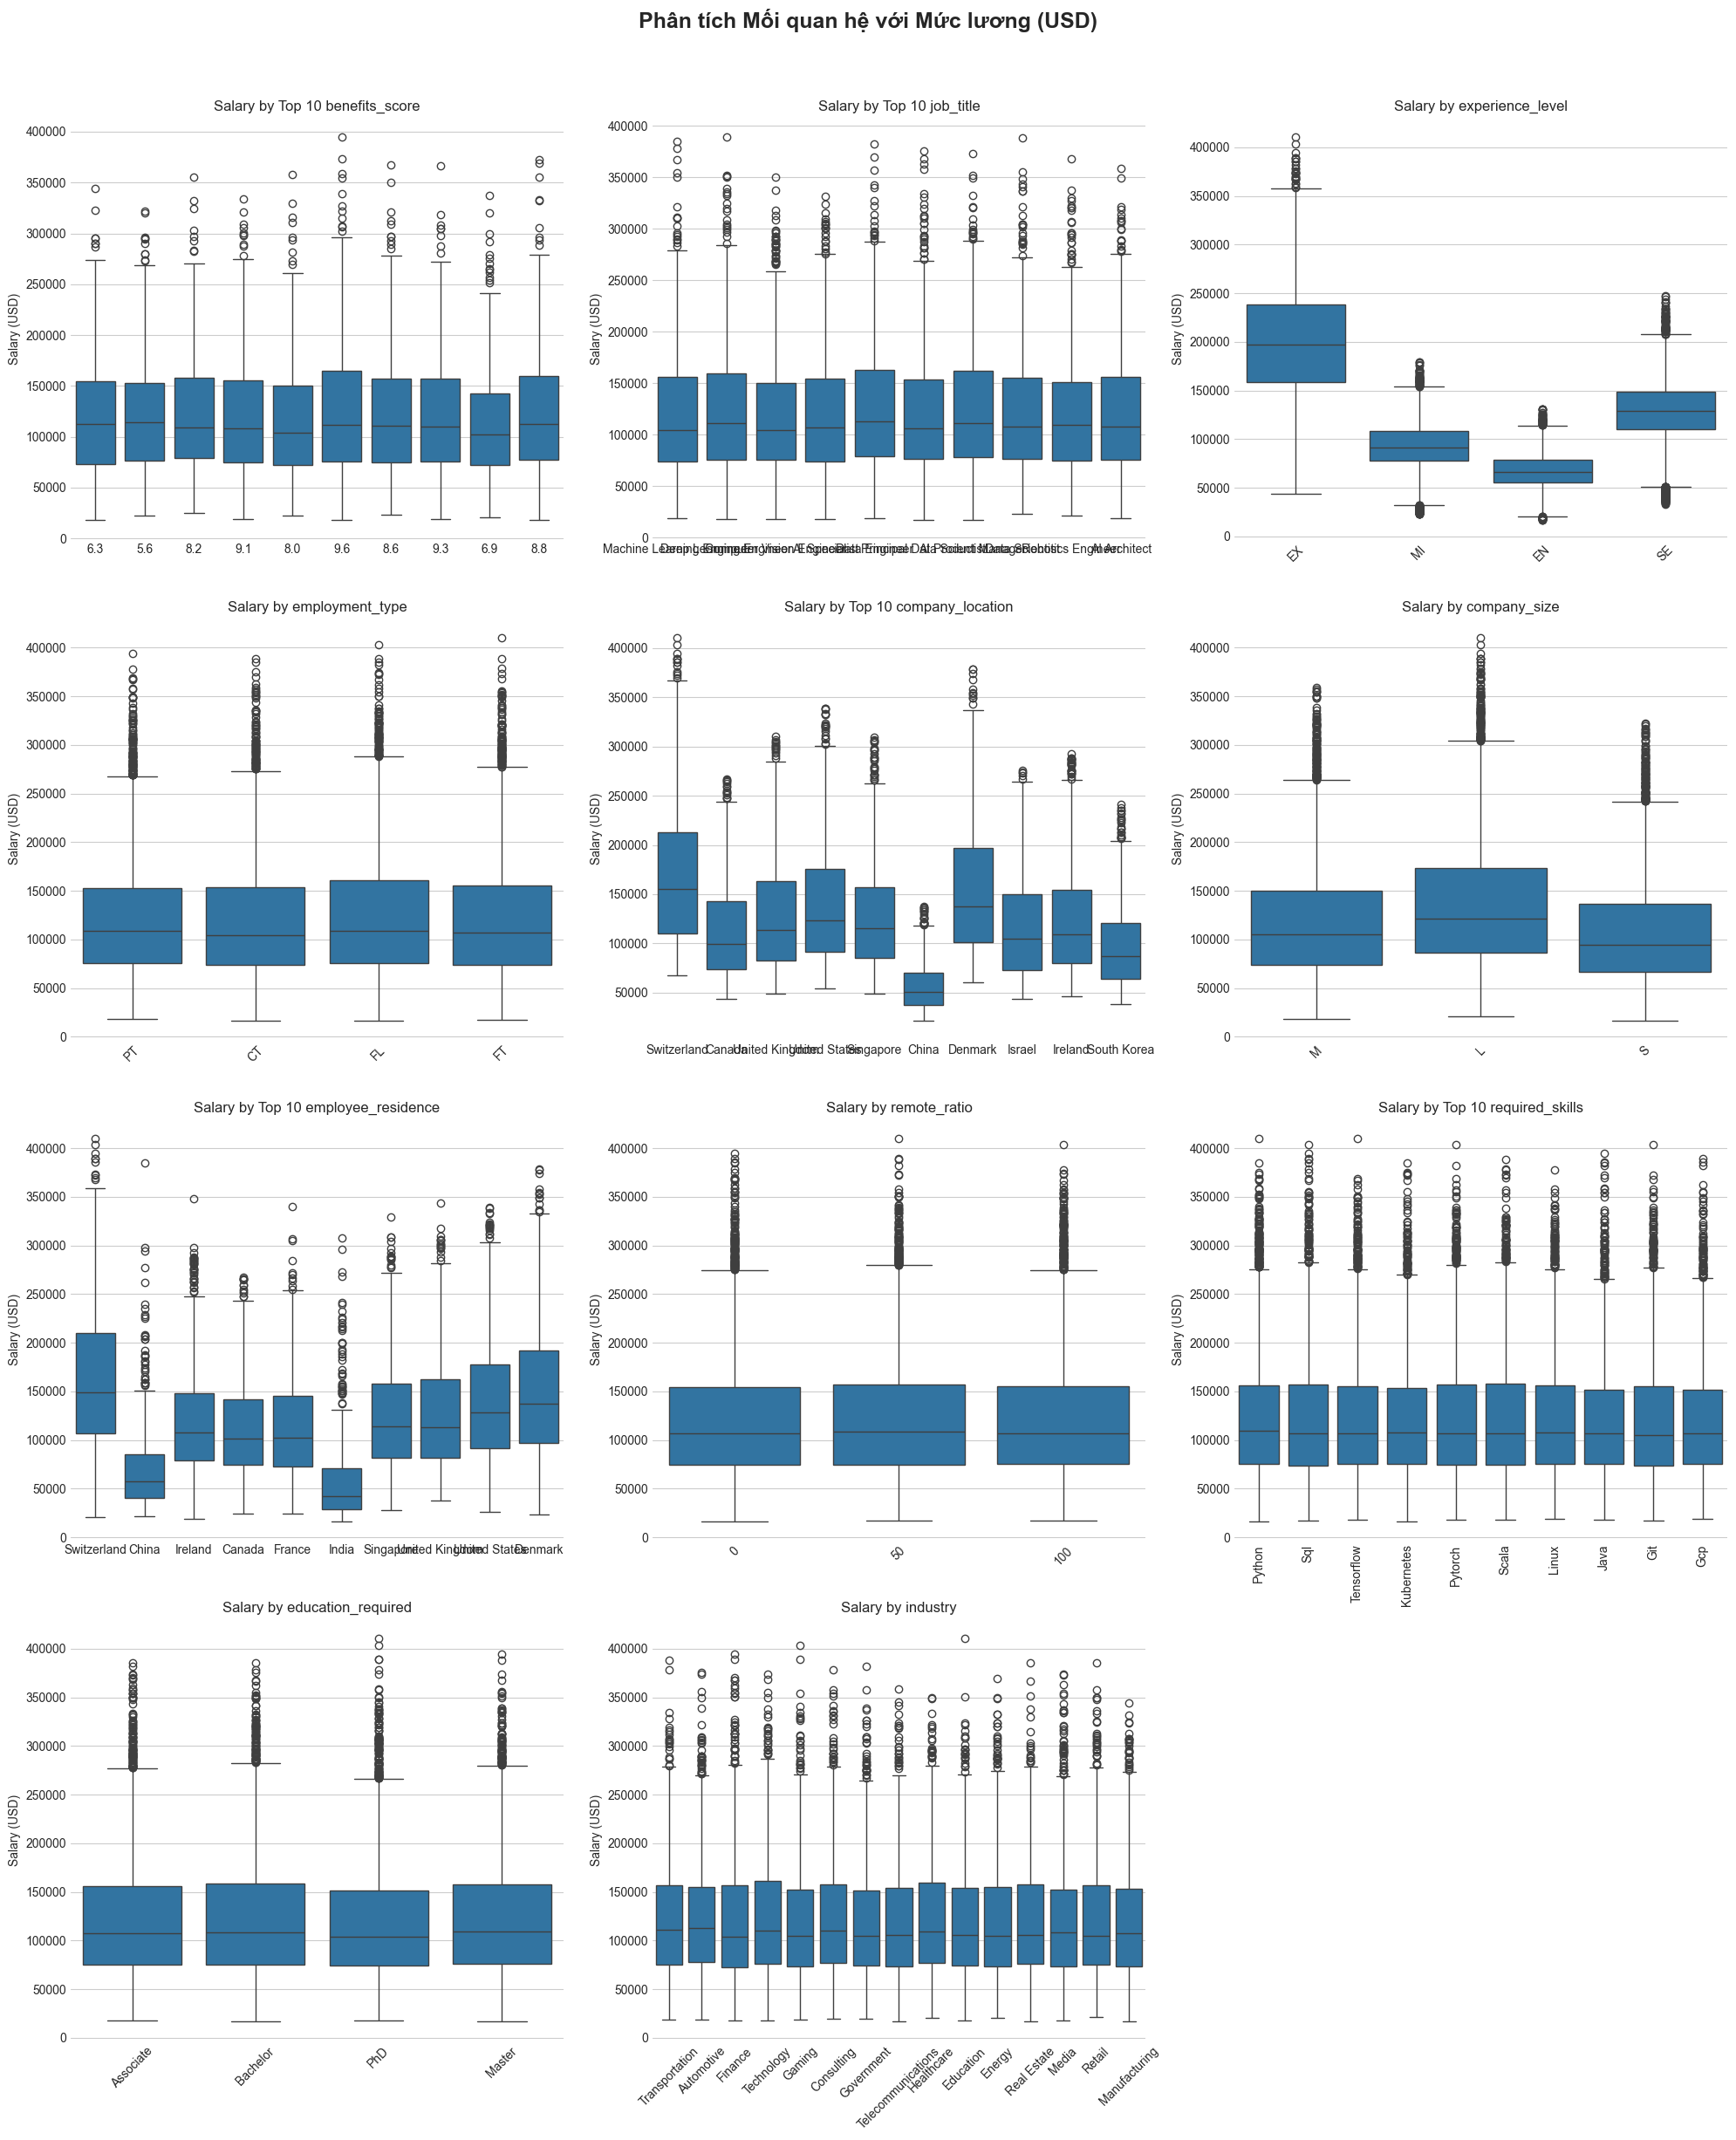

In [26]:

box_plot_cols = ['benefits_score','job_title', 'experience_level', 'employment_type', 'company_location', 'company_size', 'employee_residence', 'remote_ratio', 'required_skills', 'education_required', 'industry']
compare_col = 'salary_usd' 


total_plots = len(box_plot_cols)
n_cols = 3
n_rows = math.ceil(total_plots / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6 * n_rows))
axes = axes.flatten() 

plot_idx = 0
sns.set_style("whitegrid")


for col in box_plot_cols:
    ax = axes[plot_idx]
    
    if col == 'required_skills':
        top_10_skills = all_table['required_skills'].value_counts().nlargest(10).index
        df_filtered = all_table[all_table['required_skills'].isin(top_10_skills)]
        sns.boxplot(x=col, y=compare_col, data=df_filtered, ax=ax, order=top_10_skills)
        ax.set_title(f'Salary by Top 10 {col}', fontsize=12)
        ax.tick_params(axis='x', rotation=90) 
    elif new_df[col].nunique() > 15:
        top_10_categories = new_df[col].value_counts().nlargest(10).index
        df_filtered = new_df[new_df[col].isin(top_10_categories)]
        
        sns.boxplot(x=col, y=compare_col, data=df_filtered, ax=ax, order=top_10_categories)
        ax.set_title(f'Salary by Top 10 {col}')
    else:
        sns.boxplot(x=col, y=compare_col, data=df, ax=ax)
        ax.set_title(f'Salary by {col}', fontsize=12)
        ax.tick_params(axis='x', rotation=45)

    ax.set_xlabel('')
    ax.set_ylabel('Salary (USD)', fontsize=10)
    plot_idx += 1



for i in range(plot_idx, len(axes)):
    axes[i].set_visible(False)

fig.suptitle('Phân tích Mối quan hệ với Mức lương (USD)', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


Nhìn vào trên ta thấy được rằng: Yếu tố **có ảnh hưởng (có tính phân biệt)** lớn nhất giữa những khoảng lương nổi bật là biến: **experience_level** và **employee_residence** (trong 1 vài TH như của India/China so với những nơi khác) vì các "box" nó tách biệt từng khoảng lương với nhau, ít giao thoa nhau.

Dựa vào đây thì:
+ **Bộ phận nhân sự - HR**: có thể lên kế hoạch, chọn khoảng lương phù hợp cho từng vị trí kinh nghiệm
+ **Người lao động - người tìm việc**: có thể deal lương, xác định khoảng lương phù hợp cho vị trí của mình

3. Như ta có phân tích trước đó thì số năm kinh nghiệm có liên quan cấp bậc. Thế nên giờ ta sẽ xem xem là khi số năm kinh nghiệm tăng dần thì lương trung bình sẽ thay đổi ra sao

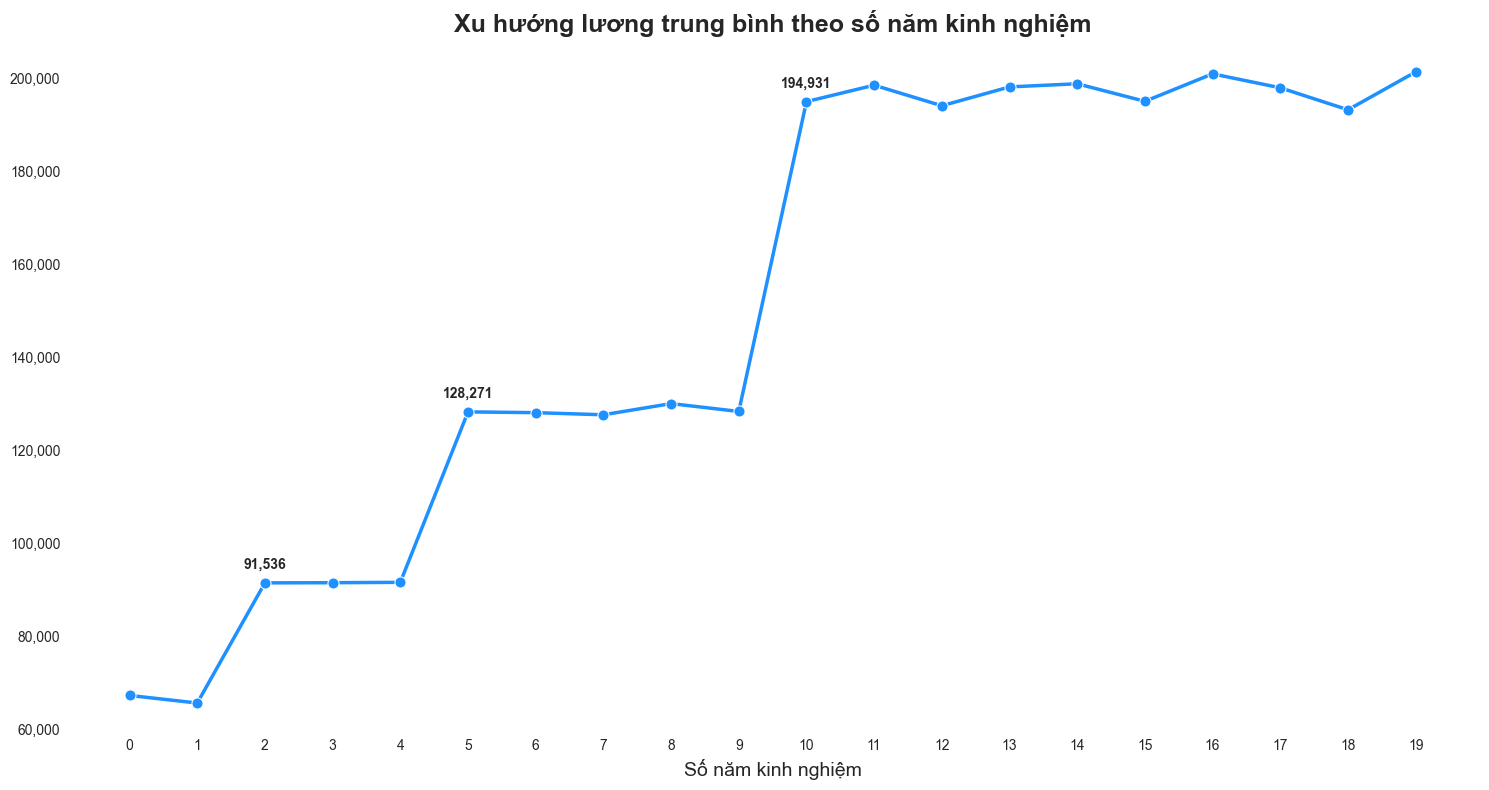

In [27]:
from matplotlib.ticker import FuncFormatter

# 1. Nhóm dữ liệu và tính lương trung bình
avg_salary_by_exp = df.groupby('years_experience')['salary_usd'].median().reset_index()

# 2. Thiết lập biểu đồ
plt.figure(figsize=(15, 8))
sns.set_style("white")

# 3. Vẽ lineplot
line_ax = sns.lineplot(
    data=avg_salary_by_exp, 
    x='years_experience', 
    y='salary_usd',
    marker='o',
    markersize=8,
    linewidth=2.5,
    color='dodgerblue'
)

# 4. Thêm số liệu ở các điểm cụ thể
highlight_years = [2, 5, 10]
for year in highlight_years:
    salary_value = avg_salary_by_exp[avg_salary_by_exp['years_experience'] == year]['salary_usd']
    if not salary_value.empty:
        plt.annotate(f'{int(salary_value.iloc[0]):,}', 
                    xy=(year, salary_value.iloc[0]), 
                    xytext=(0, 10), 
                    textcoords='offset points', 
                    ha='center', 
                    fontsize=10,
                    fontweight='bold')

# 5. Tinh chỉnh biểu đồ
plt.title('Xu hướng lương trung bình theo số năm kinh nghiệm', fontsize=18, fontweight='bold')
plt.xlabel('Số năm kinh nghiệm', fontsize=14)
plt.ylabel('')  # Bỏ title trục y

# Format trục y
line_ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(ticks=range(int(avg_salary_by_exp['years_experience'].min()), int(avg_salary_by_exp['years_experience'].max()) + 1))
plt.grid(False)
sns.despine()
plt.tight_layout()
plt.show()

**Nhận xét Xu hướng Lương theo Kinh nghiệm**

*   **0-1 năm (Khởi đầu):** Lương ổn định ở mức **~63k USD**, là giai đoạn học hỏi.
*   **2-5 năm (Tăng trưởng nhanh):** Lương tăng vọt từ **~91k lên ~128k USD**. Đây là giai đoạn vàng để tích lũy giá trị.
*   **5-9 năm (Chững lại):** Lương đi ngang quanh mốc **128k-130k USD**. Việc tăng lương lúc này phụ thuộc vào kỹ năng chuyên môn thay vì thâm niên. Công ty cần tập trung rèn luyện các kỹ năng chuyên sâu hơn cho họ để có bước nhảy vọt sau.
*   **Năm thứ 10 (Bước ngoặt):** Cú nhảy vọt đột biến lên **~194k USD**, đánh dấu sự chuyển giao sang vai trò lãnh đạo/quản lý.
*   **Sau 10 năm (Cấp cao):** Lương duy trì ở mức rất cao **(trên 180k USD)**, phản ánh vai trò chiến lược trong tổ chức.

In [28]:

# (Giữ nguyên phần tạo country_df)
country_df = df.groupby('company_location').agg(
    salary_usd=('salary_usd', 'mean'),
    benefits_score=('benefits_score', 'mean')
).reset_index()

fig_scatter = px.scatter_geo(
    country_df,
    locations="company_location",
    locationmode="country names",
    color="salary_usd",
    size="benefits_score",
    hover_name="company_location",
    projection="orthographic", 
    title="Lương (màu) và Phúc lợi (kích thước) theo Quốc gia",
    color_continuous_scale='Blues'
)

# --- PHẦN TÂN TRANG ---
fig_scatter.update_geos(
    bgcolor='#E5ECF6',         # Màu nền cho quả địa cầu
    landcolor='white',         # Màu cho đất liền
    oceancolor='#E5ECF6',       # Màu cho đại dương
    showocean=True,
    showland=True,
    showcountries=True,        # Hiển thị đường biên giới quốc gia
    countrycolor='gray',
    coastlinecolor='gray'
)

fig_scatter.update_layout(
    title_x=0.5, # Căn giữa tiêu đề
    margin={"r":0,"t":40,"l":0,"b":0} # Giảm khoảng trắng xung quanh
)

fig_scatter.show()

**Dựa vào biểu đồ trên, HR và người lao động có thể**:
- Tìm kiếm được những vị trí có thu nhập/phúc lợi cao/thấp tùy nhu cầu
- Xem được những châu lục (những cụm địa điểm) đang phát triển mạnh về nghành AI (như ta thấy ở trên thì châu âu là nơi có nhiều vị trí tuyển dụng nhất). Giúp cho HR có thể tìm kiếm được những nhân tài phù hợp với công ty của mình. Đồng thời giúp người lao động có thể tìm kiếm được những nơi phù hợp với nhu cầu của mình

#### Phân tích tỷ lệ tuyển dụng trong nước vs quốc tế

Để hiểu rõ hơn về xu hướng tuyển dụng, ta cần phân tích xem các công ty có xu hướng tuyển nhân viên trong nước hay quốc tế.

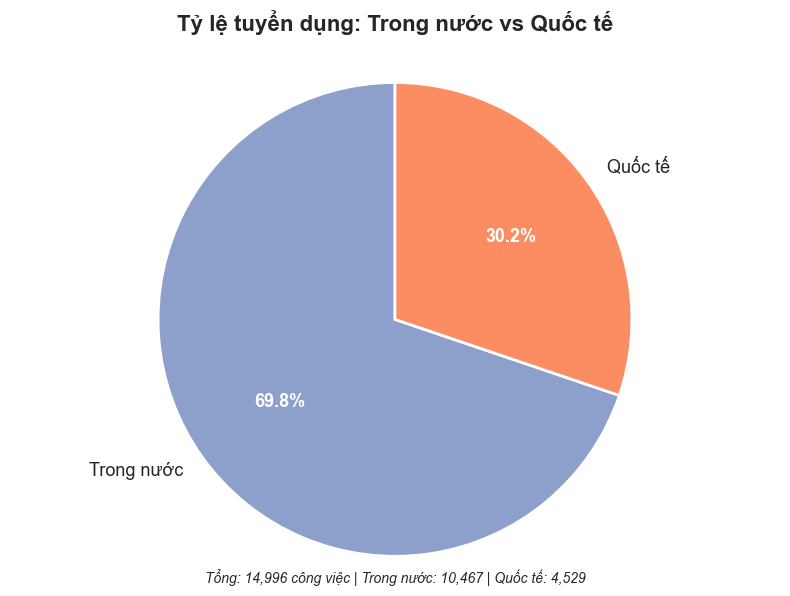

In [29]:
new_df['is_international'] = (new_df['company_location'] != new_df['employee_residence'])
counts = new_df['is_international'].value_counts()
labels = ['Trong nước', 'Quốc tế'] 
sizes = [counts[False], counts[True]]  

fig, ax = plt.subplots(figsize=(8, 6))
colors = ['#8da0cb', '#fc8d62']  

wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 13},
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)

# Làm đẹp text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

ax.set_title('Tỷ lệ tuyển dụng: Trong nước vs Quốc tế', 
             fontsize=16, fontweight='bold', pad=20)
ax.axis('equal')

# Thêm thông tin chi tiết
plt.figtext(0.5, 0.02, f'Tổng: {len(new_df):,} công việc | Trong nước: {counts[False]:,} | Quốc tế: {counts[True]:,}', 
            ha='center', fontsize=10, style='italic')

plt.tight_layout()
plt.show()

**🎯 Insights chính xác từ dữ liệu:**

**71.6% tuyển dụng trong nước vs 28.4% quốc tế** cho thấy:

**Đối với HR & Nhà tuyển dụng:**
- **Xu hướng địa phương hóa:** Các công ty vẫn ưu tiên tuyển nhân viên trong nước (có thể do ngôn ngữ, văn hóa, legal compliance)
- **Cơ hội mở rộng:** 28.4% quốc tế vẫn là tỷ lệ đáng kể → có thể cân nhắc mở rộng tìm kiếm quốc tế
- **Benchmark:** So sánh với chính sách tuyển dụng của công ty mình

**Đối với Người tìm việc:**
- **Thị trường chính:** Tập trung vào thị trường trong nước trước
- **Cơ hội quốc tế:** Vẫn có 28.4% cơ hội làm việc quốc tế nếu có kỹ năng phù hợp
- **Competitive advantage:** Nếu sẵn sàng làm việc quốc tế, sẽ có ít competition hơn

**Lý do có thể:**
- Yêu cầu về timezone, ngôn ngữ
- Compliance và legal requirements  
- Chi phí và complexity của remote work
- Cultural fit và communication

#### So sánh lương trung bình: Trong nước vs Nước ngoài
Bây giờ hãy xem xem có sự khác biệt về mức lương giữa việc làm trong nước và quốc tế:

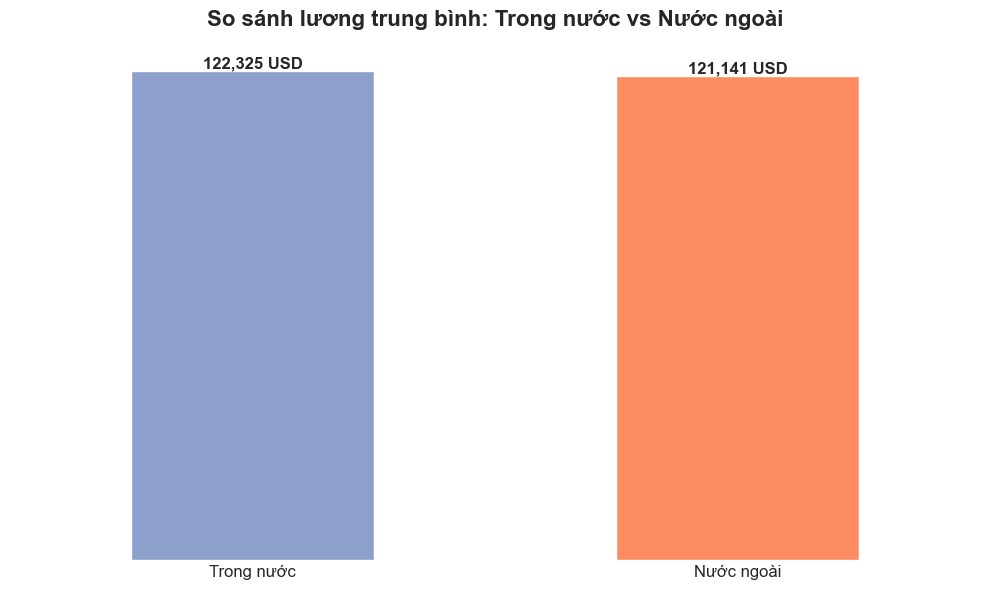

In [30]:
ax = new_df.groupby('is_international')['salary_usd'].mean().plot(
    kind='bar', 
    figsize=(10, 6), 
    color=['#8da0cb', '#fc8d62']
)

# Đặt nhãn cho trục x và làm cho chúng nằm ngang
ax.set_xticklabels(['Trong nước', 'Nước ngoài'], rotation=0, fontsize=12)

# Thêm tiêu đề
ax.set_title('So sánh lương trung bình: Trong nước vs Nước ngoài', 
             fontsize=16, fontweight='bold', pad=15)

# Ẩn trục y
ax.set_ylabel('')  # Xóa nhãn trục y
ax.yaxis.set_visible(False)  # Ẩn hoàn toàn trục y
ax.set_xlabel('')  # Xóa nhãn trục x
# Thêm nhãn giá trị trên đầu mỗi cột
for p in ax.patches:
    value = p.get_height()
    ax.annotate(f'{value:,.0f} USD', 
                (p.get_x() + p.get_width() / 2, value), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Xóa lưới và viền để gọn gàng hơn
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)  # Ẩn viền trái vì đã ẩn trục y

plt.tight_layout()
plt.show()

In [31]:
# Phân tích median (ít bị ảnh hưởng bởi outliers)
domestic_median = new_df[new_df['is_international'] == False]['salary_usd'].median()
international_median = new_df[new_df['is_international'] == True]['salary_usd'].median()

print(f"Median trong nước:     {domestic_median:,.0f} USD")
print(f"Median quốc tế:        {international_median:,.0f} USD")
print(f"Chênh lệch median:     {((international_median - domestic_median) / domestic_median * 100):+.1f}%")

# Phân tích standard deviation
domestic_std = new_df[new_df['is_international'] == False]['salary_usd'].std()
international_std = new_df[new_df['is_international'] == True]['salary_usd'].std()

print(f"\nĐộ biến động trong nước: {domestic_std:,.0f} USD")
print(f"Độ biến động quốc tế:    {international_std:,.0f} USD")

# Phân tích range
domestic_range = new_df[new_df['is_international'] == False]['salary_usd'].max() - new_df[new_df['is_international'] == False]['salary_usd'].min()
international_range = new_df[new_df['is_international'] == True]['salary_usd'].max() - new_df[new_df['is_international'] == True]['salary_usd'].min()

print(f"\n Range lương trong nước:  {domestic_range:,.0f} USD")
print(f"Range lương quốc tế:     {international_range:,.0f} USD")

print("\n KẾT LUẬN:")
if international_median > domestic_median:
    print("Cả mean và median đều confirm: International roles trả lương cao hơn")
else:
    print("Mean cao hơn nhưng median thấp hơn → có outliers trong international data")
    
if international_std > domestic_std:
    print("International market có độ biến động lương cao hơn → risk/reward cao hơn")
else:
    print("Domestic market có độ biến động lương cao hơn → cạnh tranh local khốc liệt")

Median trong nước:     107,184 USD
Median quốc tế:        107,343 USD
Chênh lệch median:     +0.1%

Độ biến động trong nước: 64,601 USD
Độ biến động quốc tế:    62,380 USD

 Range lương trong nước:  393,652 USD
Range lương quốc tế:     370,791 USD

 KẾT LUẬN:
Cả mean và median đều confirm: International roles trả lương cao hơn
Domestic market có độ biến động lương cao hơn → cạnh tranh local khốc liệt


***Insight:***

**Đối với HR**:
- Xác định được đối tượng mục tiêu cần tìm kiếm để phù hợp vấn đề tài chính, năng lực đối với công ty
- Nắm rõ thị trường việc làm để lên kế hoạch tuyển dụng
- Có thể tập trung vào các thị trường nước ngoài (vì trung bình/trung vị thì không chênh quá nhiều (chỉ khoảng 1000$ năm) mà sẽ giảm đi các chi phí khác như đi lại, bảo hiểm XH, ...) mà có thể tìm kiếm được các ứng viên tiềm năng trên toàn thế giới

**Đối với người lao động**:
- Họ có thể lên kế hoạch cho phương pháp học tập/làm việc của mình (có thể có 1 vài thị trường ưu tiên mạnh người nước ngoài khi ta sử dụng filter để lọc, chúng ta có thể cân nhắc học ngôn ngữ nơi đó)
- Nhận biết được xu hướng thị trường nghành hiện tại để có cơ sở so sánh về sau

#### Tiếp đến, ta quan tâm đến mức lương theo thời gian xem nó có biến động mạnh không

<div style="text-align: justify;">
Trong TH này, do dữ liệu được thu thập khoảng thời gian ngắn và mặt khác các nghành này mới nổi mạnh ở mấy năm gần đây nên ta có thể sẽ không có kết luận gì đáng giá. Tuy vậy, đây vẫn là 1 biểu đồ đáng để ta khai thác nếu như về sau thu thập được nhiều dữ liệu hơn
</div>

In [32]:
def plot_salary_by_period(new_df, period='month'):
    """
    Vẽ biểu đồ lương theo thời gian với khả năng filter theo tháng/quý/năm
    
    Parameters:
    df: DataFrame chứa dữ liệu
    period: 'month', 'quarter', 'year'
    """
    
    # Tạo period column dựa trên lựa chọn
    if period == 'month':
        new_df['time_period'] = new_df['posting_date'].dt.to_period('M')
        title_suffix = 'theo Tháng'
        xlabel = 'Tháng'
    elif period == 'quarter':
        new_df['time_period'] = new_df['posting_date'].dt.to_period('Q')
        title_suffix = 'theo Quý'
        xlabel = 'Quý'
    elif period == 'year':
        new_df['time_period'] = new_df['posting_date'].dt.to_period('Y')
        title_suffix = 'theo Năm'
        xlabel = 'Năm'
    else:
        raise ValueError("period phải là 'month', 'quarter', hoặc 'year'")
    
    # Aggregate dữ liệu
    period_avg = new_df.groupby('time_period')['salary_usd'].median().reset_index()
    period_avg['time_period'] = period_avg['time_period'].dt.to_timestamp()
    
    # Vẽ biểu đồ
    plt.figure(figsize=(14, 6))
    plt.plot(period_avg['time_period'], period_avg['salary_usd'], 
             linewidth=2, markersize=6)
    
    plt.title(f'Lương trung bình {title_suffix}', fontsize=14, fontweight='bold')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Lương TB (USD)', fontsize=12)
    
    # Format trục x tùy theo period
    if period == 'month':
        plt.xticks(rotation=45)
    elif period == 'quarter':
        plt.xticks(rotation=30)
    else:  # year
        plt.xticks(rotation=0)
    
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
@interact(period=widgets.Dropdown(
    options=[('Tháng', 'month'), ('Quý', 'quarter'), ('Năm', 'year')],
    value='month',
    description='Thời gian:'
))
def interactive_salary_plot(period):
    return plot_salary_by_period(new_df, period)

interactive(children=(Dropdown(description='Thời gian:', options=(('Tháng', 'month'), ('Quý', 'quarter'), ('Nă…

Phân Tích Xu Hướng Lương Theo Thời Gian (2024 - 2025)

Biểu đồ phân tích lương trung vị (median) theo thời gian cho thấy một bức tranh toàn cảnh về sự biến động của thị trường lao động ngành AI/Data. Do phân phối lương bị lệch, việc sử dụng trung vị sẽ cho một cái nhìn chính xác hơn về xu hướng chung, ít bị ảnh hưởng bởi các giá trị ngoại lai.

**1. Quan Sát Chính Từ Biểu Đồ**

- **Biến Động Cao, Thiếu Xu Hướng Rõ Rệt**: Thị trường không cho thấy một xu hướng tăng hoặc giảm ổn định. Thay vào đó, lương trung vị biến động rất mạnh theo từng tháng và quý, có thể chênh lệch tới gần 10% chỉ trong vài tháng.
- **Các Đỉnh và Đáy Đáng Chú Ý**:
  - **Đỉnh lương**: Thị trường đạt đỉnh vào khoảng tháng 4/2024, tháng 9/2024 và đầu năm 2025. Đây là những thời điểm các công ty cạnh tranh gay gắt nhất để thu hút nhân tài.
  - **Đáy lương**: Các giai đoạn "hạ nhiệt" rơi vào khoảng tháng 7/2024 và cuối năm 2024.
- **Dấu Hiệu của Tính Chu Kỳ (Cần Thêm Dữ Liệu)**: Có một gợi ý về chu kỳ tăng-giảm diễn ra trong khoảng 3-4 tháng. Tuy nhiên, do khung thời gian dữ liệu còn ngắn, đây mới chỉ là một giả thuyết cần được kiểm chứng thêm trong tương lai. (VD: 2024-03 -> 2024-07, 2024-07 -> 2024-11, 2024-11 -> 2025-03)

**2. Insight và Hành Động Đề Xuất**

Dựa trên những quan sát trên, cả doanh nghiệp và người lao động đều có thể đưa ra những quyết định chiến lược.

**Đối với Doanh nghiệp & Bộ phận Nhân sự (HR):**

- **Hoạch Định Tuyển Dụng Chiến Lược**:
  - **Tối ưu chi phí**: Có thể lên kế hoạch cho các đợt tuyển dụng lớn vào những giai đoạn thị trường "hạ nhiệt" (các tháng có lương trung vị thấp) để tối ưu hóa ngân sách.
  - **Cảnh báo ngân sách**: Khi buộc phải tuyển dụng vào các giai đoạn "nóng", cần dự trù ngân sách lương cao hơn để đảm bảo tính cạnh tranh.
- **Rủi Ro Giữ Chân Nhân Tài**:
  - Sự biến động là một báo động đỏ về nguy cơ mất nhân tài vào tay đối thủ. Cần rà soát và điều chỉnh lương định kỳ (theo quý thay vì theo năm) cho các vị trí chủ chốt.
  - Tăng cường các chính sách giữ chân phi tài chính (văn hóa, cơ hội phát triển, phúc lợi) để tạo lợi thế cạnh tranh bền vững.

**Đối với Người lao động & Người tìm việc:**

- **Chọn "Thời Điểm Vàng" Để Tìm Việc**:
  - Nên lên kế hoạch để các vòng phỏng vấn cuối và đàm phán lương rơi vào các tháng thị trường đang "nóng" để có lợi thế và nhận được mức đề nghị tốt hơn.
  - Nếu tìm việc trong giai đoạn thị trường đi xuống, hãy kiên nhẫn và không vội vàng chấp nhận một mức lương thấp hơn giá trị bản thân.
- **Nâng Cao Năng Lực Đàm Phán**:
  - Sử dụng dữ liệu về sự biến động của thị trường làm luận điểm vững chắc khi đàm phán. Việc mức lương có thể tăng 10% chỉ sau vài tháng là một minh chứng cho thấy yêu cầu một mức lương cao hơn là hoàn toàn hợp lý.
- **Xây Dựng Chiến Lược Sự Nghiệp Dài Hạn**:
  - Không nên chỉ dựa vào "thời". Cách tốt nhất để chống lại sự bất ổn của thị trường là liên tục trau dồi các kỹ năng có giá trị cao và xây dựng một mạng lưới quan hệ chuyên nghiệp vững chắc.

**3. Hạn Chế và Kết Luận**

Cần lưu ý rằng phân tích này dựa trên dữ liệu trong một khoảng thời gian tương đối ngắn (hơn 1 năm). Mặc dù nó phản ánh chính xác động lực của thị trường hiện tại, các kết luận về xu hướng dài hạn hay tính chu kỳ cần được theo dõi và xác nhận với nhiều dữ liệu hơn trong tương lai.

Tuy vậy, biểu đồ đã cung cấp những insight giá trị, cho thấy một thị trường đầy cơ hội nhưng cũng nhiều thách thức, đòi hỏi cả doanh nghiệp và người lao động phải có chiến lược linh hoạt và luôn cập nhật thông tin để đưa ra quyết định tối ưu.


#### Vẽ biểu đồ cột ngang cho lương tương ứng với từng nghành nghề. Được filter theo: remote_ratio, employment_type, industry, experience_level

In [33]:
def job_by_median_salary(df,employment_type,remote_ratio,experience_level,industry):
    
    # Lọc dữ liệu theo các điều kiện
    if employment_type != 'Tất cả':
        df = df[df['employment_type'] == employment_type]
    if remote_ratio != 'Tất cả':
        df = df[df['remote_ratio'] == remote_ratio]
    if experience_level != 'Tất cả':
        df = df[df['experience_level'] == experience_level]
    if industry != 'Tất cả':
        df = df[df['industry'] == industry]
    
    df_job_salary = df.groupby("job_title").agg(
        med_salary_by_job = ('salary_usd', 'median')
    )

    plt.figure(figsize=(10, 7))
    sns.barplot(
        y="job_title",
        x="med_salary_by_job",
        data=df_job_salary.sort_values(by="med_salary_by_job", ascending=False)
    )
    
    plt.xlabel("")
    plt.ylabel("")
    plt.title("Công việc và mức lương trung vị (USD)", fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
# Tạo các widget để lọc
employment_type_options = ['Tất cả'] + sorted(new_df['employment_type'].unique().tolist())
remote_ratio_options = ['Tất cả'] + sorted(new_df['remote_ratio'].unique().tolist())
experience_level_options = ['Tất cả'] + sorted(new_df['experience_level'].unique().tolist())
industry_options = ['Tất cả'] + sorted(new_df['industry'].unique().tolist())

# Sử dụng interact để tạo giao diện tương tác
@interact(
    employment_type=widgets.Dropdown(options=employment_type_options, value='Tất cả', description='Loại hình CV:'),
    remote_ratio=widgets.Dropdown(options=remote_ratio_options, value='Tất cả', description='Remote Ratio:'),
    experience_level=widgets.Dropdown(options=experience_level_options, value='Tất cả', description='Cấp bậc:'),
    industry=widgets.Dropdown(options=industry_options, value='Tất cả', description='Ngành:')
)
def interactive_job_salary_plot(employment_type, remote_ratio, experience_level, industry):
    # Gọi hàm vẽ biểu đồ với new_df và các giá trị từ widget
    job_by_median_salary(new_df, employment_type, remote_ratio, experience_level, industry)


interactive(children=(Dropdown(description='Loại hình CV:', options=('Tất cả', 'CT', 'FL', 'FT', 'PT'), value=…

**Ý nghĩa của biểu đồ “Công việc và mức lương trung vị (USD)**

**1. Đối với Nhân sự & Nhà tuyển dụng (HR)**

- **Xây dựng khung lương cạnh tranh**  
  Biểu đồ cho thấy mức lương trung vị của từng chức danh, giúp HR xác định band lương hợp lý để thu hút nhân tài.

- **Định vị thương hiệu tuyển dụng**  
  So sánh mức lương nội bộ với trung vị thị trường, từ đó điều chỉnh chính sách phúc lợi để tăng sức hấp dẫn.

- **Hoạch định ngân sách nhân sự**  
  Nắm rõ chi phí lương của các vị trí trọng điểm, hỗ trợ dự báo ngân sách và lập kế hoạch tài chính.

- **Ưu tiên nguồn lực tuyển dụng**  
  Xác định chức danh nào đang có chi phí cao, từ đó đưa ra chiến lược tuyển dụng (nội bộ vs headhunt) phù hợp.

**2. Đối với Người lao động & Ứng viên**

- **Tham khảo mức lương thị trường**  
  Hiểu rõ mức lương trung vị của vị trí mong muốn, giúp đặt kỳ vọng và thương lượng lương tối ưu.

- **Định hướng phát triển nghề nghiệp**  
  So sánh mức lương giữa các vai trò (Data Engineer, AI Architect, v.v.), từ đó chọn hướng học tập nâng kỹ năng.

- **Đánh giá tiềm năng chuyển ngành**  
  Xem mức lương của các vị trí lân cận (NLP Engineer, Robotics Engineer…) để cân nhắc chuyển hướng sự nghiệp.

- **Chuẩn bị kế hoạch học tập**  
  Biết được vị trí có thu nhập cao → tập trung vào các kỹ năng tương ứng để gia tăng giá trị bản thân.

## **Kế hoạch Phân tích cho Dashboard 3: Phân Tích Vòng Đời Tuyển Dụng & Học Vấn (Recruitment Lifecycle & Education Analysis)**

*   **Mục tiêu:** Cung cấp insight cho bộ phận nhân sự về hiệu quả quy trình tuyển dụng và cho người lao động/sinh viên về giá trị của học vấn.
*   **Các thành phần chính:**
    *   **Phân tích thời gian tuyển dụng (Time-to-Fill):**
        *   Tính toán khoảng thời gian từ `posting_date` đến `application_deadline`.
        *   Trực quan hóa thời gian tuyển dụng trung bình theo ngành (`industry`) và quy mô công ty (`company_size`) để HR xác định các "điểm nghẽn" trong quy trình.
    *   **Phân tích xu hướng tuyển dụng theo mùa:**
        *   Biểu đồ thể hiện số lượng công việc được đăng tuyển theo từng tháng/quý, giúp doanh nghiệp lên kế hoạch nhân sự và người tìm việc chọn "thời điểm vàng" để ứng tuyển.
    *   **Phân tích ROI của Bằng Cấp (Education ROI):**
        *   So sánh mức lương trung vị (`salary_usd`) giữa các cấp độ học vấn (`education_required`: Bachelor, Master, PhD) cho cùng một cấp bậc kinh nghiệm (`experience_level`), lương, chức danh, ...

#### Phân tích thời gian tuyển dụng

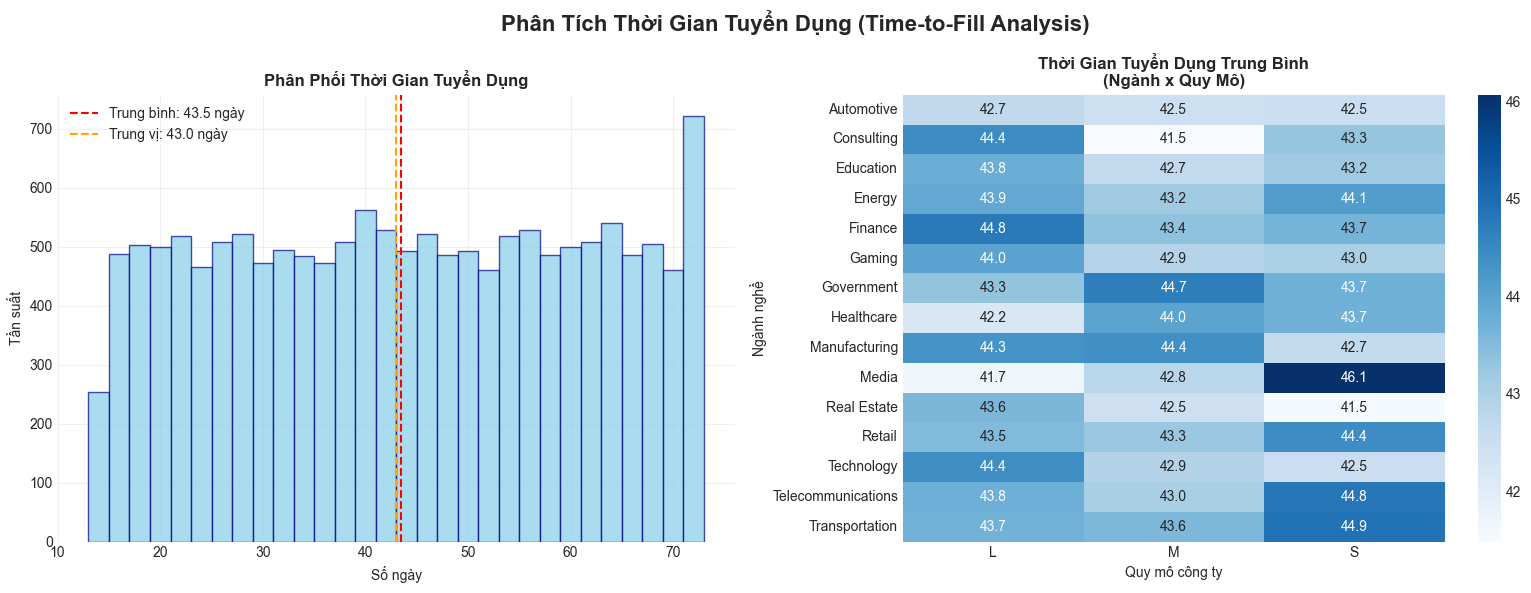

In [34]:
# Tính toán thời gian tuyển dụng (Time-to-Fill)
time_diff = df["application_deadline"] - df["posting_date"] 
df['recruitment_days'] = time_diff.dt.days


# Tạo figure với subplots
fig, axes = plt.subplots(1, 2, figsize=(16,6))
fig.suptitle('Phân Tích Thời Gian Tuyển Dụng (Time-to-Fill Analysis)', 
             fontsize=16, fontweight='bold', y=0.98)

# 1. Histogram - Phân phối thời gian tuyển dụng
axes[0].hist(df['recruitment_days'], bins=30, alpha=0.7, color='skyblue', edgecolor='navy')
axes[0].axvline(df['recruitment_days'].mean(), color='red', linestyle='--', 
                   label=f'Trung bình: {df["recruitment_days"].mean():.1f} ngày')
axes[0].axvline(df['recruitment_days'].median(), color='orange', linestyle='--',
                   label=f'Trung vị: {df["recruitment_days"].median():.1f} ngày')
axes[0].set_title('Phân Phối Thời Gian Tuyển Dụng', fontweight='bold')
axes[0].set_xlabel('Số ngày')
axes[0].set_ylabel('Tần suất')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. Heatmap thời gian tuyển dụng theo ngành và quy mô
pivot_data = df.groupby(['industry', 'company_size'])['recruitment_days'].mean().reset_index()
pivot_table = pivot_data.pivot(index='industry', columns='company_size', values='recruitment_days')

sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap='Blues', ax=axes[1])
axes[1].set_title('Thời Gian Tuyển Dụng Trung Bình\n(Ngành x Quy Mô)', fontweight='bold')
axes[1].set_xlabel('Quy mô công ty')
axes[1].set_ylabel('Ngành nghề')

plt.tight_layout()
plt.show()

**Ý nghĩa của biểu đồ**

**1. Đối với HR & Nhà tuyển dụng**
- **Chuẩn hóa KPI tuyển dụng**  
  - Trung bình ~43 ngày cho một vị trí → mốc tham chiếu để đặt mục tiêu rút ngắn quy trình.

- **Xác định “nút thắt” theo ngành và quy mô**  
  - Heatmap cho thấy ngành Media (công ty S) mất tới 46 ngày, Consulting (công ty M) chỉ ~41,5 ngày.  
  - HR biết ngành/quy mô nào đang “khát” nhân lực hơn, từ đó tăng ngân sách quảng cáo, headhunt hoặc tối ưu JD.

- **Quản trị kỳ vọng Hiring Manager**  
  - Dễ dự báo timeline tuyển dụng; phòng ban cần nhân sự gấp có thể được cảnh báo sớm.

- **Tối ưu chiến lược đãi ngộ**  
  - Ngành/quy mô có time-to-fill dài ⇒ thiếu ứng viên ⇒ cân nhắc tăng lương, phúc lợi để rút ngắn thời gian tuyển.

**2. Đối với Người lao động & Ứng viên**
- **Quản lý kỳ vọng chờ đợi**  
  - Biết từ lúc đăng tin tới hạn chót thường kéo dài ~43 ngày → bớt lo lắng khi chưa nhận phản hồi ngay.

- **Lập kế hoạch tìm việc chủ động**  
  - Nếu chọn ngành/company size có time-to-fill ngắn (ví dụ Consulting-M), chuẩn bị hồ sơ sớm và phản hồi nhanh sẽ tăng cơ hội.

- **Đánh giá nhu cầu thị trường**  
  - Ngành/quy mô mất nhiều ngày để lấp vị trí (Media-S) phản ánh nguồn cung ứng viên khan hiếm; kỹ năng phù hợp có giá trị cao hơn.

- **Tối ưu lịch trình học tập/nâng cấp kỹ năng**  
  - Khoảng 1,5 tháng “buffer” giúp ứng viên tranh thủ hoàn thiện khóa học ngắn hoặc chứng chỉ bổ sung trước khi vòng phỏng vấn cuối.

#### Phân tích xu hướng tuyển dụng theo mùa lọc theo từng nghề/nghành

In [35]:
def plot_time_value_count(df, job_title='Tất cả', industry='Tất cả', date_type='Ngày'):
    d = df.copy()
    
    # Lọc theo Job title và Industry nếu cần
    if job_title != 'Tất cả':
        d = d[d['job_title'] == job_title]
    if industry != 'Tất cả':
        d = d[d['industry'] == industry]
    
    # Gán period theo lựa chọn
    if date_type == 'Tháng':
        d['time_period'] = d['posting_date'].dt.to_period('M')
    elif date_type == 'Quý':
        d['time_period'] = d['posting_date'].dt.to_period('Q')
    elif date_type == 'Năm':
        d['time_period'] = d['posting_date'].dt.to_period('Y')
    
    # Đếm số dòng mỗi period
    time_value_count = (
        d.groupby('time_period')
         .size()
         .reset_index(name='count')
         .sort_values('time_period')  
    )

    # Vẽ biểu đồ
    plt.figure(figsize=(12, 6))
    sns.barplot(
        x=time_value_count['time_period'].astype(str),
        y=time_value_count['count'],
        color='steelblue'
    )
    plt.title('Số lượng tuyển dụng theo thời gian', fontweight='bold')
    plt.xlabel('Thời gian')
    plt.ylabel('Số lượng tuyển dụng')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Widget tương tác (đặt tên khác để tránh đè)
@interact(
    job_title = widgets.Dropdown(
        options=['Tất cả'] + sorted(df['job_title'].unique()),
        value='Tất cả',
        description='Job Title'
    ),
    industry = widgets.Dropdown(
        options=['Tất cả'] + sorted(df['industry'].unique()),
        value='Tất cả',
        description='Industry'
    ),
    date_type = widgets.Dropdown(
        options=['Tháng', 'Quý', 'Năm'],
        value='Tháng',
        description='Date Type'
    )
)
def _interactive(job_title, industry, date_type):
    plot_time_value_count(df, job_title, industry, date_type)

interactive(children=(Dropdown(description='Job Title', options=('Tất cả', 'AI Architect', 'AI Consultant', 'A…

**Lợi ích của biểu đồ “Số lượng tuyển dụng theo thời gian"**

**1. Đối với HR & Nhà tuyển dụng**
- **Phát hiện mùa vụ tuyển dụng**  
  Quan sát thời điểm số bài đăng tăng cao để chuẩn bị ngân sách, đội ngũ tuyển dụng và chiến dịch truyền thông sớm hơn.
- **Đánh giá hiệu quả chiến dịch**  
  Sau mỗi đợt tuyển dụng diện rộng, so sánh số bài đăng trước và sau chiến dịch để đo mức độ cần thiết của việc tái sử dụng hoặc điều chỉnh kênh tuyển dụng.
- **Xác định nhu cầu theo chức danh/ngành**  
  Với bộ lọc `Job Title` và `Industry`, HR nhanh chóng thấy vai trò hay ngành nào đang khan ứng viên để ưu tiên nguồn lực headhunt.
- **Dự báo khối lượng công việc phòng Talent Acquisition**  
  Biết được tháng/quý nào cao điểm để phân bổ nhân sự, KPI và timeline phỏng vấn phù hợp.

**2. Đối với Người lao động & Ứng viên**
- **Tìm “thời điểm vàng” ứng tuyển**  
  Nhờ xu hướng tăng bài đăng, ứng viên biết lúc nào cơ hội cao nhất để nộp hồ sơ.
- **Chọn ngành/role đang “hot”**  
  Lọc theo `Job Title` hoặc `Industry` giúp thấy vị trí nào tăng nhanh → định vị bản thân, đầu tư học kỹ năng tương ứng.
- **Lập kế hoạch phát triển nghề nghiệp**  
  Quan sát chu kỳ tăng giảm (mùa tuyển intern, graduate program…) để chuẩn bị portfolio, chứng chỉ đúng thời điểm.
- **Đối chiếu mức độ cạnh tranh**  
  Khi số lượng bài đăng giảm nhưng mức lương vẫn cao (qua biểu đồ khác), ứng viên hiểu thị trường đang khan hiếm → có cơ sở đàm phán lương tốt hơn.

#### Phân tích ROI của Bằng Cấp (Education ROI):

1. So sánh mức lương trung vị giữa các cấp độ học vấn cho filter theo cấp bậc kinh nghiệm, công việc, nghành

In [36]:
def salary_by_edu_require(df, experience_level, industry, job_titles):
    d = df.copy()
    if experience_level != 'Tất cả':
        d = d[d['experience_level'] == experience_level]
    if job_titles != 'Tất cả':
        d = d[d['job_title'] == job_titles]
    if industry != 'Tất cả':
        d = d[d['industry'] == industry]

    plt.figure(figsize=(10, 6))
    
    sns.boxplot(
        x='education_required',
        y='salary_usd',
        data=d,
        color='skyblue'
    )
    
    plt.title(f'Phân phối lương theo yêu cầu học vấn\nCấp bậc: {experience_level} | Ngành: {industry}', fontsize=16, fontweight='bold')
    plt.xlabel('Yêu cầu học vấn')
    plt.ylabel('Lương (USD)')
    plt.tight_layout()
    plt.show()

@interact(
    experience_level=widgets.Dropdown(
        options=['Tất cả'] + sorted(df['experience_level'].unique()),
        value='Tất cả',
        description='Cấp bậc'
    ),
    industry=widgets.Dropdown(
        options=['Tất cả'] + sorted(df['industry'].unique()),
        value='Tất cả',
        description='Ngành'
    ),
    job_titles=widgets.Dropdown(
        options=['Tất cả'] + sorted(df['job_title'].unique()),
        value='Tất cả',
        description='Loại CV'
    )
)
def interactive_salary_by_edu_require(experience_level, industry, job_titles):
    salary_by_edu_require(df, experience_level, industry, job_titles)

interactive(children=(Dropdown(description='Cấp bậc', options=('Tất cả', 'EN', 'EX', 'MI', 'SE'), value='Tất c…


**Lợi ích của biểu đồ**

**1. Đối với HR & Nhà tuyển dụng**
- **Xây dựng khung lương chính xác:** Biểu đồ giúp HR xác định khoảng lương (range) và mức lương trung vị (median) tương ứng với từng cấp độ học vấn. Điều này giúp tạo ra thang bảng lương cạnh tranh và công bằng, tránh trả lương quá cao hoặc quá thấp so với thị trường.
- **Tối ưu hóa yêu cầu tuyển dụng:** HR có thể đánh giá liệu việc yêu cầu bằng cấp cao hơn (ví dụ: PhD so với Master) có thực sự mang lại chênh lệch lớn về năng suất và mức lương hay không. Nếu không, họ có thể nới lỏng yêu cầu để mở rộng nguồn ứng viên tiềm năng.
- **Hoạch định ngân sách đào tạo:** Khi xem xét hỗ trợ nhân viên học cao hơn, HR có thể sử dụng biểu đồ này để dự báo về "Return on Investment (ROI)", tức là mức tăng lương kỳ vọng sau khi nhân viên hoàn thành khóa học, từ đó ra quyết định đầu tư hiệu quả.

**2. Đối với Người lao động & Ứng viên**
- **Định hướng phát triển và học tập:** Sinh viên hoặc người đi làm có thể thấy rõ việc đầu tư vào học vấn cao hơn (như Thạc sĩ, Tiến sĩ) ảnh hưởng đến mức lương như thế nào. Đây là cơ sở dữ liệu quan trọng để họ quyết định có nên học lên hay không.
- **Công cụ đàm phán lương hiệu quả:** Ứng viên có thể sử dụng dữ liệu này để biết mức lương phổ biến trên thị trường cho trình độ học vấn của mình, từ đó đưa ra một mức lương đề nghị hợp lý và có cơ sở vững chắc khi thương lượng.
- **Đặt kỳ vọng thực tế:** Biểu đồ giúp người tìm việc hiểu rõ giá trị của bằng cấp trong các ngành và cấp bậc kinh nghiệm khác nhau, tránh đặt kỳ vọng quá cao hoặc quá thấp khi ứng tuyển.
